**List of libraries used in CM1:**


1.   pandas
2.   numpy
3.   sklearn.preprocessing.MinMaxScalar



# **CM1 - Data Cleaning for IRIS Dataset**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [ ]:
# Loading the dataset into a Pandas Dataframe
iris_data = pd.read_csv('/content/iris_dataset_missing.csv')
iris_data.head()

sepal_length  sepal_width  petal_length  petal_width          species
0      5.045070     2.508203      3.018024     1.164924  Iris-versicolor
1      6.325517     2.115481      4.542052     1.413651  Iris-versicolor
2      5.257497     3.814303      1.470660     0.395348      Iris-setosa
3      6.675168     3.201700      5.785461     2.362764   Iris-virginica
4      5.595237     2.678166      4.077750     1.369266  Iris-versicolor

In [ ]:
# Analyzing the loaded data to see what it has and how we can perform cleaning
print("Column names: "+str(iris_data.columns.values))
print("sepal_length:type = " + str(type(iris_data["sepal_length"][0])))
print("sepal_width:type = " + str(type(iris_data["sepal_width"][0])))
print("petal_length:type = " + str(type(iris_data["petal_length"][0])))
print("petal_width:type = " + str(type(iris_data["petal_width"][0])))
print("Data description:")
iris_data.describe()

Column names: ['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'species']
sepal_length:type = <class 'numpy.float64'>
sepal_width:type = <class 'numpy.float64'>
petal_length:type = <class 'numpy.float64'>
petal_width:type = <class 'numpy.float64'>
Data description:


sepal_length  sepal_width  petal_length  petal_width
count    105.000000   101.000000     97.000000   105.000000
mean       5.858909     3.059083      3.812370     1.199708
std        0.861638     0.455116      1.793489     0.787193
min        4.344007     1.946010      1.033031    -0.072203
25%        5.159145     2.768688      1.545136     0.333494
50%        5.736104     3.049459      4.276817     1.331797
75%        6.435413     3.290318      5.094427     1.817211
max        7.795561     4.409565      6.768611     2.603123

From the above output we can observe that given dataset has 5 columns 
(including target coulmn). 
'species' is the target columns and the other four are feature columns.
'sepal_length' has no missing values. 
'sepal_width' has 4 values missing
'petal_length' has 8 values missing
'petal_width' has no missing values.
Now, based on the type of data that these columns have, we can decide which method we can use to handle the missing values.

As we can see, all the four columns here have Float data in them and the data is numeric.
So, there are many ways in which we can handle missing values - dropping rows with missing values, approximating the missing values, etc.


**Method 1: Dropping rows with missing values (Iris)**

In [ ]:
# Method 1: drop rows with missing values. 
iris_data_dropped_missing_rows = iris_data.dropna()
iris_data_dropped_missing_rows.describe()

sepal_length  sepal_width  petal_length  petal_width
count     93.000000    93.000000     93.000000    93.000000
mean       5.867894     3.054935      3.808118     1.209826
std        0.892271     0.439463      1.811399     0.793656
min        4.344007     1.946010      1.033031    -0.072203
25%        5.152435     2.794790      1.541564     0.333494
50%        5.636744     3.049459      4.192791     1.369266
75%        6.478961     3.239682      5.098860     1.837925
max        7.795561     4.249211      6.768611     2.603123

From the above description we can see that we lost 12 examples in this method. And 12 out of 105 is a sgnificant number. Therefore, we have lost a significant amount of data and it is plausible that this will have a great impact on model performance.

**Method 2 : Filling missing values with approximation (mean) (Iris)**

In [ ]:
# Method 2 - Filling missing values with approximation. Let's try 'mean'
iris_data_mean_approximated = iris_data.fillna(iris_data.mean(skipna=True))
iris_data_mean_approximated.describe()

sepal_length  sepal_width  petal_length  petal_width
count    105.000000   105.000000    105.000000   105.000000
mean       5.858909     3.059083      3.812370     1.199708
std        0.861638     0.446278      1.723128     0.787193
min        4.344007     1.946010      1.033031    -0.072203
25%        5.159145     2.771731      1.588587     0.333494
50%        5.736104     3.056142      4.089166     1.331797
75%        6.435413     3.239682      5.062244     1.817211
max        7.795561     4.409565      6.768611     2.603123

Here, we retained all the examples that we had originally and on top of that, we also mended the missing values. This is not a good choice in all the cases. The approximation might not always help because we are unintelligently replacing missing values with a static value.
However, in this case, as we have limited data, it might just do the trick. 

**Method 3: Filling missing values by Interpolation (Iris)**

In [ ]:
# Method 3 - Interpolation
iris_data_missing_interpolated = iris_data.interpolate()
iris_data_missing_interpolated.describe()

sepal_length  sepal_width  petal_length  petal_width
count    105.000000   105.000000    105.000000   105.000000
mean       5.858909     3.060633      3.831569     1.199708
std        0.861638     0.446819      1.766831     0.787193
min        4.344007     1.946010      1.033031    -0.072203
25%        5.159145     2.771731      1.588587     0.333494
50%        5.736104     3.051684      4.276817     1.331797
75%        6.435413     3.239682      5.098860     1.817211
max        7.795561     4.409565      6.768611     2.603123

In this method as well, we retained original data and rectified missing rows. Rather than hard-coding the values which are to be filled in place of the missing values, this works more intelligently. 

So far, we have used three methods of handling missing values. 
These values were not normalized. We can normalize the data to bring all features in one range. 
We need to make sure that we don't normalize the target.

Normaliztion, as it brings all feature values in same range, makes it easy to find any pattern in data and also makes it easy to compare values and draw conclusions. 

There are two methods for normaliztion shown here:

1. **Min Max Scalar**: 
new_value = (old_value - min_value) / (max_value - min_value)

2. **Z-Score Method**:
new_value = (old_value - mean) / (standard_deviation)

**Normalization Method 1: Min Max Scalar**

In [ ]:
# Method 1 - Min-max Normalization
min_max_scaler = preprocessing.MinMaxScaler()
iris_data_dropped_missing_rows_min_max_normalized = pd.DataFrame(min_max_scaler.fit_transform(iris_data_dropped_missing_rows.iloc[:, :-1].values))
iris_data_mean_approximated_min_max_normalized = pd.DataFrame(min_max_scaler.fit_transform(iris_data_mean_approximated.iloc[:, :-1].values))
iris_data_missing_interpolated_min_max_normalized = pd.DataFrame(min_max_scaler.fit_transform(iris_data_missing_interpolated.iloc[:, :-1].values))

In [ ]:
# Here, we need to rename the column names as we are constructing our own Dataframe and so, it will not have the original column names
# The normalized dataframe also does not have the target columns. So, we will add that as well, here. 
iris_data_dropped_missing_rows_min_max_normalized.columns = iris_data.columns.values[:-1]
iris_data_dropped_missing_rows_min_max_normalized['species'] = iris_data_dropped_missing_rows['species']
iris_data_mean_approximated_min_max_normalized.columns = iris_data.columns.values[:-1]
iris_data_mean_approximated_min_max_normalized['species'] = iris_data_mean_approximated['species']
iris_data_missing_interpolated_min_max_normalized.columns = iris_data.columns.values[:-1]
iris_data_missing_interpolated_min_max_normalized['species'] = iris_data_missing_interpolated['species']

In [ ]:
print("For Iris Data where rows with missing value were dropped and then the data was normalized using Min Max Scaler method:")
iris_data_dropped_missing_rows_min_max_normalized.describe()

For Iris Data where rows with missing value were dropped and then the data was normalized using Min Max Scaler method:


sepal_length  sepal_width  petal_length  petal_width
count     93.000000    93.000000     93.000000    93.000000
mean       0.441507     0.481471      0.483837     0.479205
std        0.258513     0.190806      0.315818     0.296658
min        0.000000     0.000000      0.000000     0.000000
25%        0.234221     0.368522      0.088663     0.151644
50%        0.374538     0.479094      0.550905     0.538801
75%        0.618549     0.561684      0.708878     0.713980
max        1.000000     1.000000      1.000000     1.000000

Min Max Scalar will bring all data in range [0,1]

In [ ]:
print("For Iris Data where missing values were replaced by approximation (mean) then the data was normalized using Min Max Scaler method:")
iris_data_mean_approximated_min_max_normalized.describe()

For Iris Data where missing values were replaced by approximation (mean) then the data was normalized using Min Max Scaler method:


sepal_length  sepal_width  petal_length  petal_width
count    105.000000   105.000000    105.000000   105.000000
mean       0.438904     0.451816      0.484579     0.475423
std        0.249638     0.181152      0.300428     0.294242
min        0.000000     0.000000      0.000000     0.000000
25%        0.236165     0.335175      0.096861     0.151644
50%        0.403325     0.450622      0.532838     0.524796
75%        0.605932     0.525124      0.702495     0.706237
max        1.000000     1.000000      1.000000     1.000000

In [ ]:
print("For Iris Data where missing values were replaced by interpolation then the data was normalized using Min Max Scaler method:")
iris_data_missing_interpolated_min_max_normalized.describe()

For Iris Data where missing values were replaced by interpolation then the data was normalized using Min Max Scaler method:


sepal_length  sepal_width  petal_length  petal_width
count    105.000000   105.000000    105.000000   105.000000
mean       0.438904     0.452445      0.487926     0.475423
std        0.249638     0.181372      0.308047     0.294242
min        0.000000     0.000000      0.000000     0.000000
25%        0.236165     0.335175      0.096861     0.151644
50%        0.403325     0.448812      0.565555     0.524796
75%        0.605932     0.525124      0.708878     0.706237
max        1.000000     1.000000      1.000000     1.000000

**Normalization Method 2: Z-Score** 

In [ ]:
# Method 2 - Z-Score Normalization
iris_data_dropped_missing_rows_zscore_normalized = ((iris_data_dropped_missing_rows.iloc[:, :-1] - iris_data_dropped_missing_rows.iloc[:, :-1].mean()) / iris_data_dropped_missing_rows.iloc[:, :-1].std())
iris_data_mean_approximated_zscore_normalized = ((iris_data_mean_approximated.iloc[:, :-1] - iris_data_mean_approximated.iloc[:, :-1].mean()) / iris_data_mean_approximated.iloc[:, :-1].std())
iris_data_missing_interpolated_zscore_normalized = ((iris_data_missing_interpolated.iloc[:, :-1] - iris_data_missing_interpolated.iloc[:, :-1].mean()) / iris_data_missing_interpolated.iloc[:, :-1].std())

In [ ]:
# Here, we need to rename the column names as we are constructing our own Dataframe and so, it will not have the original column names
# The normalized dataframe also does not have the target columns. So, we will add that as well, here. 
iris_data_dropped_missing_rows_zscore_normalized.columns = iris_data.columns.values[:-1]
iris_data_dropped_missing_rows_zscore_normalized['species'] = iris_data_dropped_missing_rows['species']
iris_data_mean_approximated_zscore_normalized.columns = iris_data.columns.values[:-1]
iris_data_mean_approximated_zscore_normalized['species'] = iris_data_mean_approximated['species']
iris_data_missing_interpolated_zscore_normalized.columns = iris_data.columns.values[:-1]
iris_data_missing_interpolated_zscore_normalized['species'] = iris_data_missing_interpolated['species']

In [ ]:
print("For Iris Data where rows with missing value were dropped and then the data was normalized using Z-Score method:")
iris_data_dropped_missing_rows_zscore_normalized.describe()

For Iris Data where rows with missing value were dropped and then the data was normalized using Z-Score method:


sepal_length   sepal_width  petal_length   petal_width
count  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01
mean   1.454034e-15 -3.213738e-15  3.223228e-16  5.563053e-16
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min   -1.707874e+00 -2.523361e+00 -1.532013e+00 -1.615344e+00
25%   -8.018401e-01 -5.919606e-01 -1.251273e+00 -1.104170e+00
50%   -2.590573e-01 -1.246093e-02  2.123620e-01  2.008936e-01
75%    6.848459e-01  4.203927e-01  7.125660e-01  7.914002e-01
max    2.160407e+00  2.717578e+00  1.634368e+00  1.755542e+00

Z-Score method of normaliztion will bring all the values in such a range that the new mean will be 0 and new standard deviation will be 1.

In [ ]:
print("For Iris Data where missing values were replaced by approximation (mean) then the data was normalized using Z-Score method:")
iris_data_mean_approximated_zscore_normalized.describe()

For Iris Data where missing values were replaced by approximation (mean) then the data was normalized using Z-Score method:


sepal_length   sepal_width  petal_length   petal_width
count  1.050000e+02  1.050000e+02  1.050000e+02  1.050000e+02
mean   1.596606e-15 -1.867446e-15 -2.495358e-16  1.332268e-16
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min   -1.758165e+00 -2.494123e+00 -1.612961e+00 -1.615756e+00
25%   -8.121323e-01 -6.438847e-01 -1.290550e+00 -1.100384e+00
50%   -1.425244e-01 -6.589686e-03  1.606362e-01  1.677974e-01
75%    6.690791e-01  4.046785e-01  7.253521e-01  7.844367e-01
max    2.247641e+00  3.026098e+00  1.715624e+00  1.782809e+00

In [ ]:
print("For Iris Data where missing values were replaced by interpolation then the data was normalized using Z-Score method:")
iris_data_missing_interpolated_zscore_normalized.describe()

For Iris Data where missing values were replaced by interpolation then the data was normalized using Z-Score method:


sepal_length   sepal_width  petal_length   petal_width
count  1.050000e+02  1.050000e+02  1.050000e+02  1.050000e+02
mean   1.596606e-15 -2.066931e-15 -3.256654e-16  1.332268e-16
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min   -1.758165e+00 -2.494572e+00 -1.583931e+00 -1.615756e+00
25%   -8.121323e-01 -6.465742e-01 -1.269495e+00 -1.100384e+00
50%   -1.425244e-01 -2.002808e-02  2.520038e-01  1.677974e-01
75%    6.690791e-01  4.007194e-01  7.172679e-01  7.844367e-01
max    2.247641e+00  3.018965e+00  1.662322e+00  1.782809e+00

Here, we can see that unnormalized data has varying range for feature values. Whereas, the normalized version has all feature values between similar range. Also, the mean of normalized data is almost 0 (theoritically 0), and the standard deviation is 1.

Normalization is a good choice as it will scale every feature to have values between comparable ranges. 
This way we can ensure that the features will be comparable and some useful conclusion can be drawn from pattern recognition.

For example, it is difficult to compare two features with their respective ranges as [1,10] and [1, 10000]. Normalization, by any method, will save us from that problem.

# **CM1 for Heart Disease Dataset**

In [ ]:
# Loading the data into a Pandas Dataframe
heart_disease_data = pd.read_csv('/content/heart_disease_missing.csv')

In [ ]:
# Let us look at the data
heart_disease_data.head()

age  sex  cp    trestbps        chol  ...   oldpeak  slope  ca      thal  target
0   76    0   2  140.102822  197.105970  ...  1.284822    1.0   0  2.175904       1
1   43    0   0  132.079599  341.049462  ...  3.110483    1.0   0  3.082071       0
2   47    1   2  107.899290  242.822816  ... -0.023723    2.0   0  2.020827       0
3   51    1   2   99.934001         NaN  ...  1.195082    1.0   0  2.100312       1
4   57    1   0  110.103508  334.952353  ...  3.082052    1.0   1  2.831509       0

[5 rows x 14 columns]

Here, 'sex', 'fbs', 'exang' are all binary types.

In [ ]:
# Analyzing the loaded data to see what it has and how we can perform cleaning
print("Column names: "+str(heart_disease_data.columns.values))
print("Data description:")
heart_disease_data.describe()

Column names: ['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']
Data description:


age         sex          cp  ...          ca        thal      target
count  212.000000  212.000000  212.000000  ...  212.000000  211.000000  212.000000
mean    54.311321    0.688679    0.957547  ...    0.731132    2.349112    0.542453
std      9.145339    0.464130    1.022537  ...    1.038762    0.602117    0.499374
min     29.000000    0.000000    0.000000  ...    0.000000    0.858554    0.000000
25%     47.000000    0.000000    0.000000  ...    0.000000    1.949795    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.078759    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    2.970842    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.277466    1.000000

[8 rows x 14 columns]

In [ ]:
# Here, it can be seen that dataset has 212 rows and some of the columns have missing values. 

In [ ]:
# Here, we will check the type of data that every column has so that we can decide on the method to handle missing values
for c in heart_disease_data.columns.values:
  print(c + ":type = "+str(type(heart_disease_data[c][0])))

age:type = <class 'numpy.int64'>
sex:type = <class 'numpy.int64'>
cp:type = <class 'numpy.int64'>
trestbps:type = <class 'numpy.float64'>
chol:type = <class 'numpy.float64'>
fbs:type = <class 'numpy.int64'>
restecg:type = <class 'numpy.float64'>
thalach:type = <class 'numpy.float64'>
exang:type = <class 'numpy.int64'>
oldpeak:type = <class 'numpy.float64'>
slope:type = <class 'numpy.float64'>
ca:type = <class 'numpy.int64'>
thal:type = <class 'numpy.float64'>
target:type = <class 'numpy.int64'>


In [ ]:
# As we can see, every column either has 'int' or 'float'. 
# So, we can use the same methods of handling missing values as we did for Iris Dataset.

**Method 1: Dropping rows with missing values (Heart disease data)**

In [ ]:
# Method 1 - Dropping rows with missing values
heart_disease_data_dropped_missing_rows = heart_disease_data.dropna()
heart_disease_data_dropped_missing_rows.describe()

age         sex          cp  ...          ca        thal      target
count  174.000000  174.000000  174.000000  ...  174.000000  174.000000  174.000000
mean    54.649425    0.695402    0.948276  ...    0.747126    2.351880    0.528736
std      9.275368    0.461565    1.015870  ...    1.077552    0.613963    0.500614
min     29.000000    0.000000    0.000000  ...    0.000000    0.858554    0.000000
25%     47.250000    0.000000    0.000000  ...    0.000000    1.963829    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.077903    1.000000
75%     61.750000    1.000000    2.000000  ...    1.000000    2.970481    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.277466    1.000000

[8 rows x 14 columns]

Again, by this method we lost a significant amount of data and that can have a huge impact given that we have less amount of data. 

**Method 2: FIlling missing values by approximation (mean) (Heart disease data)**

In [ ]:
# Method 2 - Filling missing values with approximation. Let's try 'mean'
heart_disease_data_mean_approximated = heart_disease_data.fillna(heart_disease_data.mean(skipna=True))
heart_disease_data_mean_approximated.describe()

age         sex          cp  ...          ca        thal      target
count  212.000000  212.000000  212.000000  ...  212.000000  212.000000  212.000000
mean    54.311321    0.688679    0.957547  ...    0.731132    2.349112    0.542453
std      9.145339    0.464130    1.022537  ...    1.038762    0.600689    0.499374
min     29.000000    0.000000    0.000000  ...    0.000000    0.858554    0.000000
25%     47.000000    0.000000    0.000000  ...    0.000000    1.951169    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.081338    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    2.970682    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.277466    1.000000

[8 rows x 14 columns]

**Method 3: Filling missing values by interpolation (Heart disease data)**

In [ ]:
# Method 3 - Interpolation
heart_disease_data_missing_interpolated = heart_disease_data.interpolate()
heart_disease_data_missing_interpolated.describe()

age         sex          cp  ...          ca        thal      target
count  212.000000  212.000000  212.000000  ...  212.000000  212.000000  212.000000
mean    54.311321    0.688679    0.957547  ...    0.731132    2.351824    0.542453
std      9.145339    0.464130    1.022537  ...    1.038762    0.601986    0.499374
min     29.000000    0.000000    0.000000  ...    0.000000    0.858554    0.000000
25%     47.000000    0.000000    0.000000  ...    0.000000    1.951169    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.081338    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    2.970682    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.277466    1.000000

[8 rows x 14 columns]

So far, we have used three methods of handling missing values. 
These values were not normalized. We can normalize the data to bring all in one range.
We need to make sure that we don't normalize the target.
The binary features will not be affected by normalization as the 0 will remain 0 and 1 will remain 1 after normalization


**Method 1: Min Max Scalar (Heart disease data)**

In [ ]:
# Method 1 - Min-max Normalization
min_max_scaler = preprocessing.MinMaxScaler()
heart_disease_data_dropped_missing_rows_min_max_normalized = pd.DataFrame(min_max_scaler.fit_transform(heart_disease_data_dropped_missing_rows.iloc[:, :-1].values))
heart_disease_data_mean_approximated_min_max_normalized = pd.DataFrame(min_max_scaler.fit_transform(heart_disease_data_mean_approximated.iloc[:, :-1].values))
heart_disease_data_missing_interpolated_min_max_normalized = pd.DataFrame(min_max_scaler.fit_transform(heart_disease_data_missing_interpolated.iloc[:, :-1].values))

In [ ]:
# Here, we need to rename the column names as we are constructing our own Dataframe and so, it will not have the original column names
# The normalized dataframe also does not have the target columns. So, we will add that as well, here. 
heart_disease_data_dropped_missing_rows_min_max_normalized.columns = heart_disease_data.columns.values[:-1]
heart_disease_data_dropped_missing_rows_min_max_normalized['target'] = heart_disease_data_dropped_missing_rows['target']
heart_disease_data_mean_approximated_min_max_normalized.columns = heart_disease_data.columns.values[:-1]
heart_disease_data_mean_approximated_min_max_normalized['target'] = heart_disease_data_mean_approximated['target']
heart_disease_data_missing_interpolated_min_max_normalized.columns = heart_disease_data.columns.values[:-1]
heart_disease_data_missing_interpolated_min_max_normalized['target'] = heart_disease_data_missing_interpolated['target']

In [ ]:
print("For Heart Disease Data where rows with missing value were dropped and then the data was normalized using Min Max Scaler method:")
heart_disease_data_dropped_missing_rows_min_max_normalized.describe()

For Heart Disease Data where rows with missing value were dropped and then the data was normalized using Min Max Scaler method:


age         sex          cp  ...          ca        thal      target
count  174.000000  174.000000  174.000000  ...  174.000000  174.000000  140.000000
mean     0.534363    0.695402    0.316092  ...    0.186782    0.617354    0.492857
std      0.193237    0.461565    0.338623  ...    0.269388    0.253818    0.501744
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      0.380208    0.000000    0.000000  ...    0.000000    0.456930    0.000000
50%      0.541667    1.000000    0.333333  ...    0.000000    0.504090    0.000000
75%      0.682292    1.000000    0.666667  ...    0.250000    0.873089    1.000000
max      1.000000    1.000000    1.000000  ...    1.000000    1.000000    1.000000

[8 rows x 14 columns]

In [ ]:
print("For Heart Disease Data where missing values were replaced by approximation (mean) then the data was normalized using Min Max Scaler method:")
heart_disease_data_mean_approximated_min_max_normalized.describe()

For Heart Disease Data where missing values were replaced by approximation (mean) then the data was normalized using Min Max Scaler method:


age         sex          cp  ...          ca        thal      target
count  212.000000  212.000000  212.000000  ...  212.000000  212.000000  212.000000
mean     0.527319    0.688679    0.319182  ...    0.182783    0.616210    0.542453
std      0.190528    0.464130    0.340846  ...    0.259690    0.248330    0.499374
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      0.375000    0.000000    0.000000  ...    0.000000    0.451697    0.000000
50%      0.541667    1.000000    0.333333  ...    0.000000    0.505510    1.000000
75%      0.666667    1.000000    0.666667  ...    0.250000    0.873172    1.000000
max      1.000000    1.000000    1.000000  ...    1.000000    1.000000    1.000000

[8 rows x 14 columns]

In [ ]:
print("For Heart Disease Data where missing values were replaced by interpolation then the data was normalized using Min Max Scaler method:")
heart_disease_data_missing_interpolated_min_max_normalized.describe()

For Heart Disease Data where missing values were replaced by interpolation then the data was normalized using Min Max Scaler method:


age         sex          cp  ...          ca        thal      target
count  212.000000  212.000000  212.000000  ...  212.000000  212.000000  212.000000
mean     0.527319    0.688679    0.319182  ...    0.182783    0.617331    0.542453
std      0.190528    0.464130    0.340846  ...    0.259690    0.248866    0.499374
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      0.375000    0.000000    0.000000  ...    0.000000    0.451697    0.000000
50%      0.541667    1.000000    0.333333  ...    0.000000    0.505510    1.000000
75%      0.666667    1.000000    0.666667  ...    0.250000    0.873172    1.000000
max      1.000000    1.000000    1.000000  ...    1.000000    1.000000    1.000000

[8 rows x 14 columns]

**Method 2: Z-Score (Heart disease data)**

In [ ]:
# Method 2 - Z-Score Normalization
heart_disease_data_dropped_missing_rows_zscore_normalized = ((heart_disease_data_dropped_missing_rows.iloc[:, :-1] - heart_disease_data_dropped_missing_rows.iloc[:, :-1].mean()) / heart_disease_data_dropped_missing_rows.iloc[:, :-1].std())
heart_disease_data_mean_approximated_zscore_normalized = ((heart_disease_data_mean_approximated.iloc[:, :-1] - heart_disease_data_mean_approximated.iloc[:, :-1].mean()) / heart_disease_data_mean_approximated.iloc[:, :-1].std())
heart_disease_data_missing_interpolated_zscore_normalized = ((heart_disease_data_missing_interpolated.iloc[:, :-1] - heart_disease_data_missing_interpolated.iloc[:, :-1].mean()) / heart_disease_data_missing_interpolated.iloc[:, :-1].std())

In [ ]:
# Here, we need to rename the column names as we are constructing our own Dataframe and so, it will not have the original column names
# The normalized dataframe also does not have the target columns. So, we will add that as well, here. 
heart_disease_data_dropped_missing_rows_zscore_normalized.columns = heart_disease_data.columns.values[:-1]
heart_disease_data_dropped_missing_rows_zscore_normalized['target'] = heart_disease_data_dropped_missing_rows['target']
heart_disease_data_mean_approximated_zscore_normalized.columns = heart_disease_data.columns.values[:-1]
heart_disease_data_mean_approximated_zscore_normalized['target'] = heart_disease_data_mean_approximated['target']
heart_disease_data_missing_interpolated_zscore_normalized.columns = heart_disease_data.columns.values[:-1]
heart_disease_data_missing_interpolated_zscore_normalized['target'] = heart_disease_data_missing_interpolated['target']

In [ ]:
print("For Heart Disease Data where rows with missing value were dropped and then the data was normalized using Z-Score method:")
heart_disease_data_dropped_missing_rows_zscore_normalized.describe()

For Heart Disease Data where rows with missing value were dropped and then the data was normalized using Z-Score method:


age           sex  ...          thal      target
count  1.740000e+02  1.740000e+02  ...  1.740000e+02  174.000000
mean  -7.401487e-17 -2.424625e-17  ... -2.399103e-16    0.528736
std    1.000000e+00  1.000000e+00  ...  1.000000e+00    0.500614
min   -2.765327e+00 -1.506618e+00  ... -2.432272e+00    0.000000
25%   -7.977500e-01 -1.506618e+00  ... -6.320433e-01    0.000000
50%    3.779631e-02  6.599236e-01  ... -4.462435e-01    1.000000
75%    7.655302e-01  6.599236e-01  ...  1.007554e+00    1.000000
max    2.409670e+00  6.599236e-01  ...  1.507560e+00    1.000000

[8 rows x 14 columns]

In [ ]:
print("For Heart Disease Data where missing values were replaced by approximation (mean) then the data was normalized using Z-Score method:")
heart_disease_data_mean_approximated_zscore_normalized.describe()

For Heart Disease Data where missing values were replaced by approximation (mean) then the data was normalized using Z-Score method:


age           sex  ...          thal      target
count  2.120000e+02  2.120000e+02  ...  2.120000e+02  212.000000
mean   6.912709e-17  2.314710e-16  ...  3.377801e-16    0.542453
std    1.000000e+00  1.000000e+00  ...  1.000000e+00    0.499374
min   -2.767675e+00 -1.483808e+00  ... -2.481414e+00    0.000000
25%   -7.994587e-01 -1.483808e+00  ... -6.624779e-01    0.000000
50%    7.530385e-02  6.707626e-01  ... -4.457774e-01    1.000000
75%    7.313758e-01  6.707626e-01  ...  1.034762e+00    1.000000
max    2.480901e+00  6.707626e-01  ...  1.545484e+00    1.000000

[8 rows x 14 columns]

In [ ]:
print("For Heart Disease Data where missing values were replaced by interpolation then the data was normalized using Z-Score method:")
heart_disease_data_missing_interpolated_zscore_normalized.describe()

For Heart Disease Data where missing values were replaced by interpolation then the data was normalized using Z-Score method:


age           sex  ...          thal      target
count  2.120000e+02  2.120000e+02  ...  2.120000e+02  212.000000
mean   6.912709e-17  2.314710e-16  ... -2.484910e-16    0.542453
std    1.000000e+00  1.000000e+00  ...  1.000000e+00    0.499374
min   -2.767675e+00 -1.483808e+00  ... -2.480574e+00    0.000000
25%   -7.994587e-01 -1.483808e+00  ... -6.655566e-01    0.000000
50%    7.530385e-02  6.707626e-01  ... -4.493229e-01    1.000000
75%    7.313758e-01  6.707626e-01  ...  1.028027e+00    1.000000
max    2.480901e+00  6.707626e-01  ...  1.537649e+00    1.000000

[8 rows x 14 columns]

**Conclusion:**

From all the methods that we saw for data cleaning, we observed that we should not drop rows with missing values when we have very small amount of data. Because, as we already have a very small amount of data, losing more from that will make it difficult for us to learn patterns from it.  

Approximating missing values with a static value is also case dependent. So, replacing the missing values with mean of that column may or may not work in every case. 

On the other hand, filling missing values by interpolation suits as it fills value intelligently. Interpolation does not replace every mssing value with the same static value, but it takes in account some of the close cells and fills a value based on that. 


More than that, normalization improves the quality of data further more as it brings values in a comparable range and that makes it very easy to find pattern. Min Max Scalar or Z-Score - both methods of normalization do the required trick here, although differently. 

More insights about this can be seen during training and testing phase. 

**References:**

1. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmax#sklearn.preprocessing.MinMaxScaler



In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

# !jupyter nbconvert --to pdf fileName.ipynb

In [ ]:
!jupyter nbconvert --to pdf 657A_Assignment1.ipynb

**Libraries used in CM2:** 

1. seabron


# **CM2 for Iris Data**

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

In [ ]:
import seaborn as sns

Getting the Pair Plot for **Iris Data (raw - the one that still has missing values)**

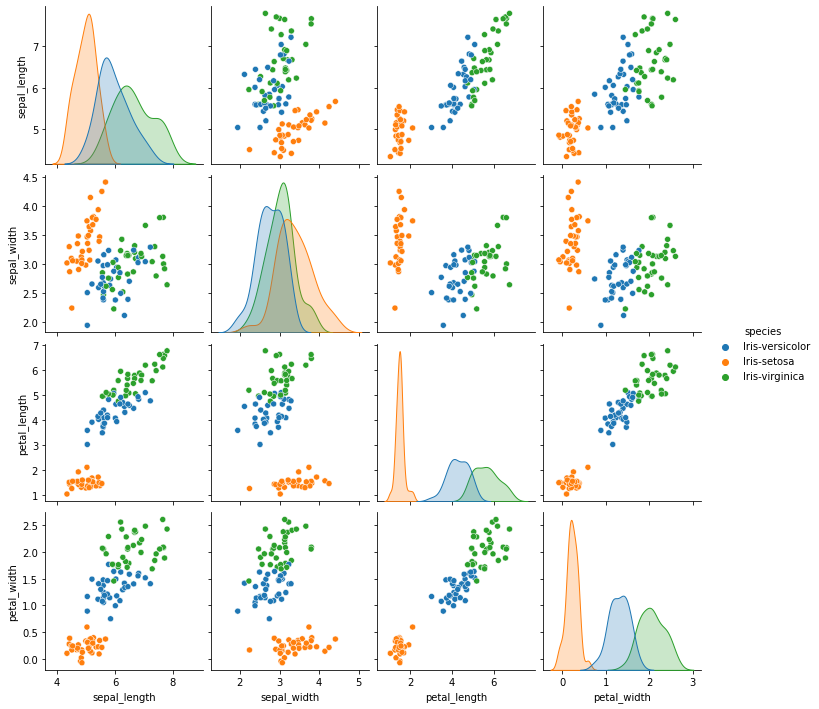

In [ ]:
sns.pairplot(iris_data, hue='species')

From the above plot we can say that almost every feature has positive correlation with the other features. 
And, it is only natural that if a flower has long petals, it will have long sepal. The same holds true for the width.

**The pairs about which we can confidently comment are:**

**1. petal_width has a positive correlation with sepal_length and petal_length.**

**2. petal_length has positive correlation with sepal_length and petal_width.**

**3. sepal_length has positive correlation with petal_length and petal_width.**

**(These are just visual conclusions.)**

Getting Pair Plot for **Iris Data in which we have dropped the rows that had missing values**

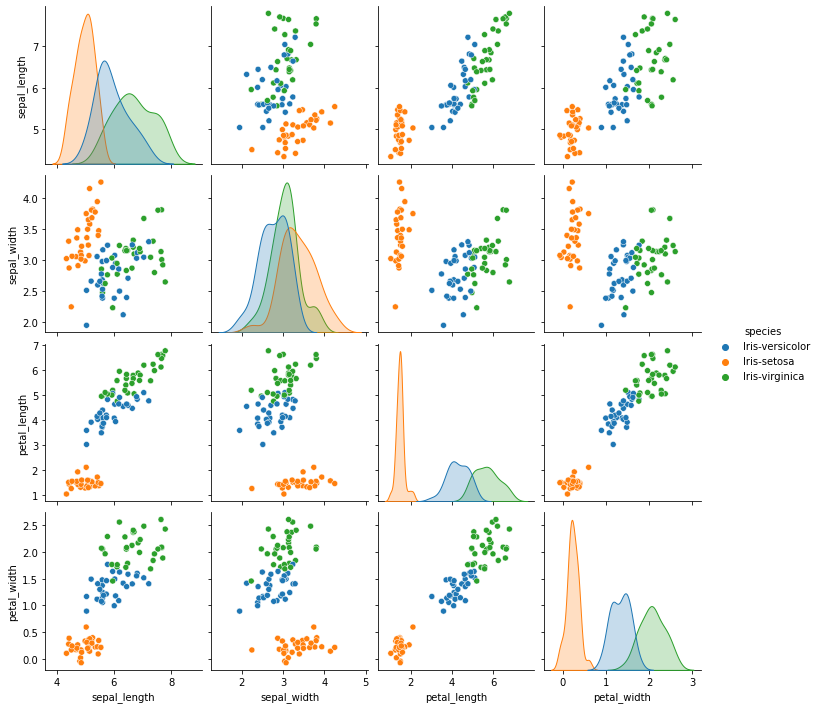

In [ ]:
sns.pairplot(iris_data_dropped_missing_rows, hue='species')

Getting Pair Plot for **Iris Data in which we filled missing values with approximation (mean)**

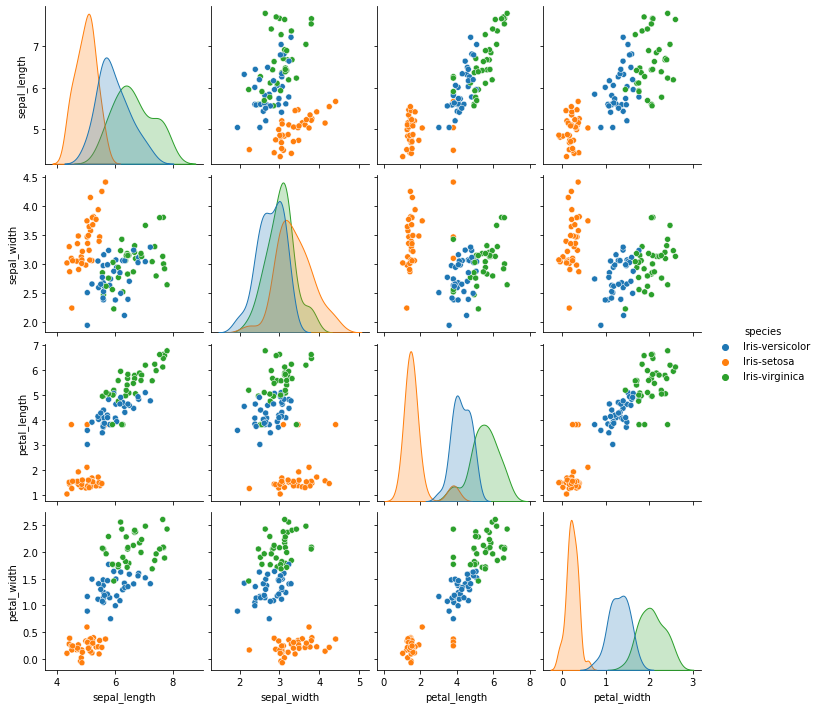

In [ ]:
sns.pairplot(iris_data_mean_approximated, hue='species')

Getting Pair Plot for **Iris Data in which we filled missing values by interpolation**

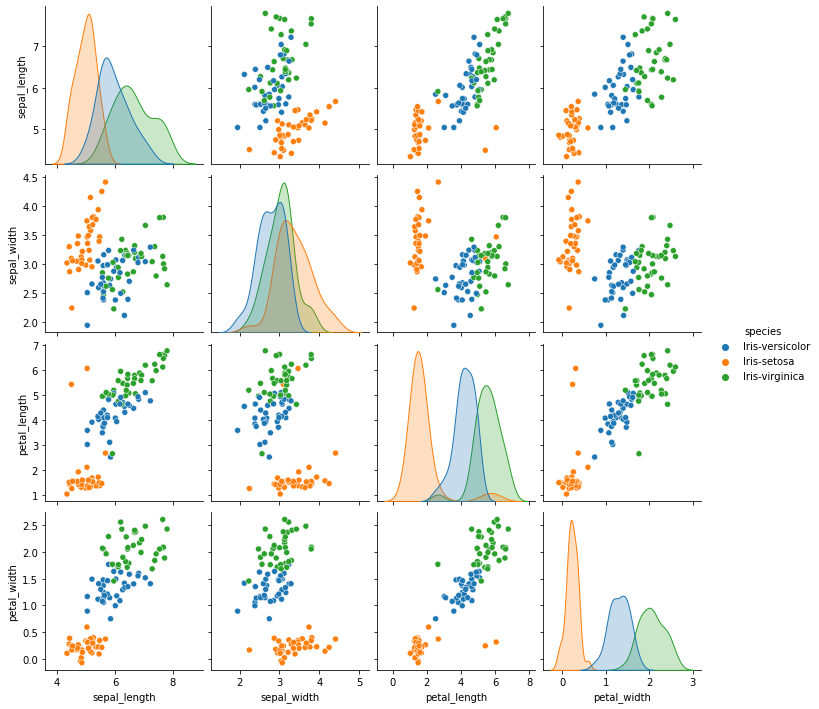

In [ ]:
sns.pairplot(iris_data_missing_interpolated, hue='species')

Getting Pair Plot for Iris Data in which we have **dropped** the rows that had **missing values** and then normalized it with **Min Max Scaler method**

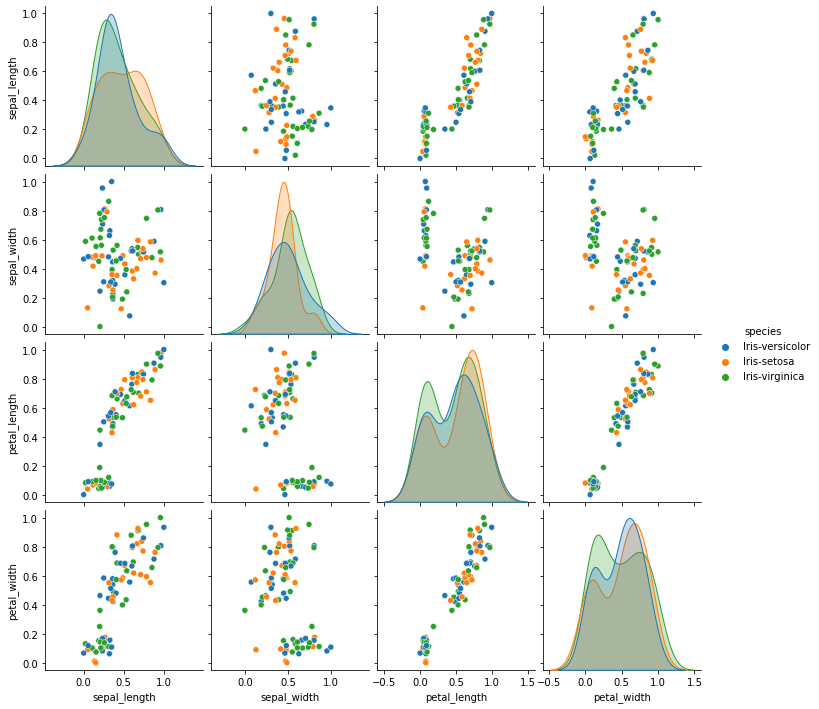

In [ ]:
sns.pairplot(iris_data_dropped_missing_rows_min_max_normalized, hue='species')

Getting Pair Plot for Iris Data in which we have **dropped** the rows that had **missing values** and then normalized it with **Z-Score** method

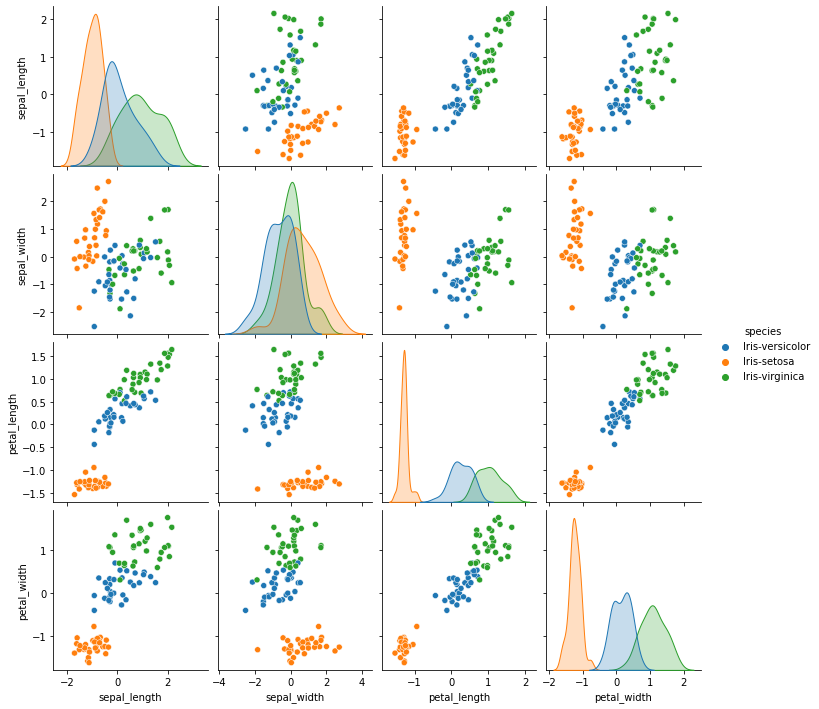

In [ ]:
sns.pairplot(iris_data_dropped_missing_rows_zscore_normalized, hue='species')

Getting Pair Plot for Iris Data in which we filled missing values ny **approximation** (mean) and then normalized with **Min Max Scaler** method

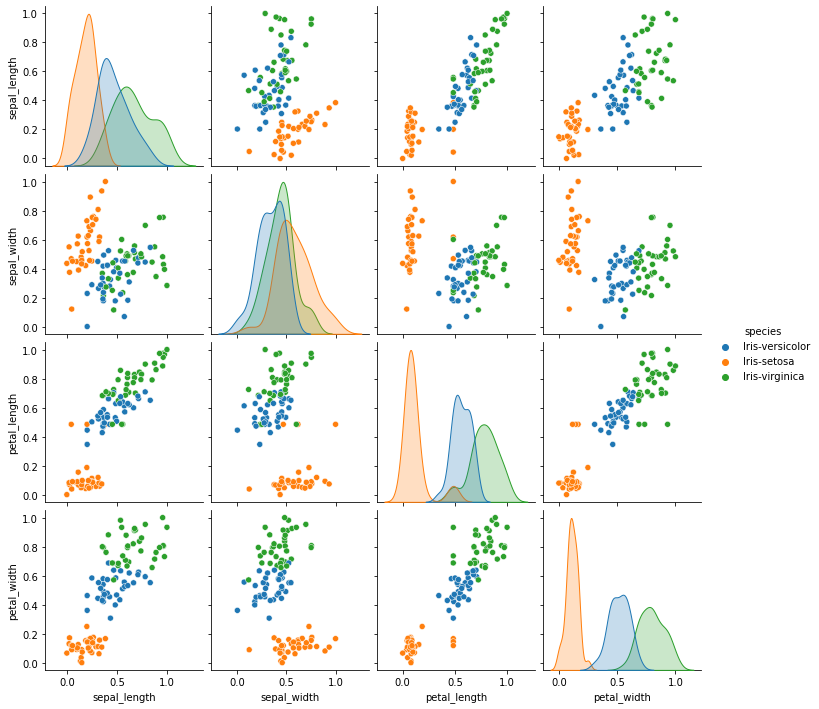

In [ ]:
# Getting Pair Plot for Iris Data in which we filled missing values ny approximation (mean) and then normalized with Min Max Scaler method
sns.pairplot(iris_data_mean_approximated_min_max_normalized, hue='species')

 Getting Pair Plot for Iris Data in which we filled missing values ny **approximation** (mean) and normalized with **Z-Score** method

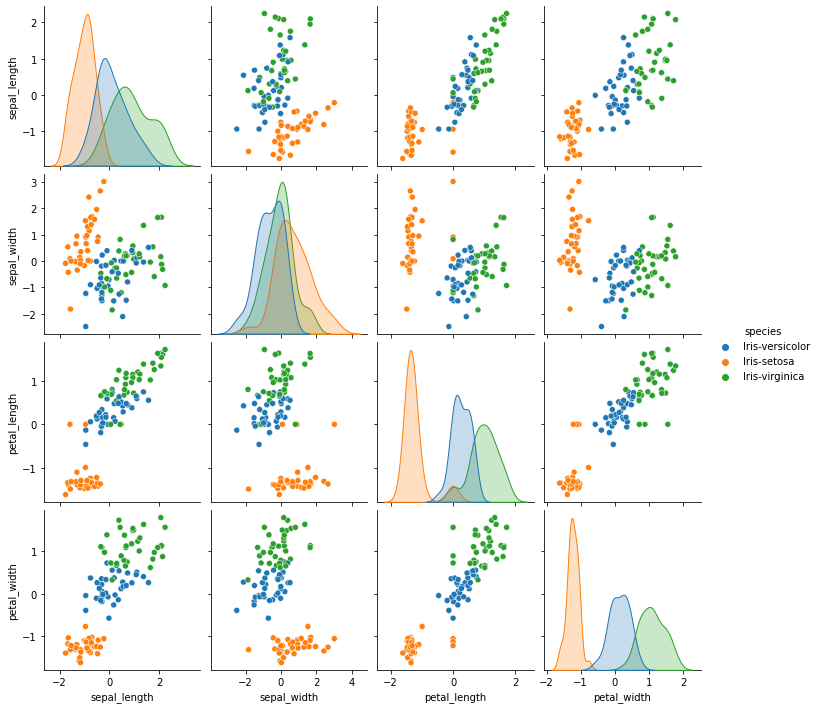

In [ ]:
# Getting Pair Plot for Iris Data in which we filled missing values ny approximation (mean) and normalized with Z-Score method
sns.pairplot(iris_data_mean_approximated_zscore_normalized, hue='species')

Getting Pair Plot for Iris Data in which we filled missing values by **interpolation** and normalized with **Min Max Scaler method**

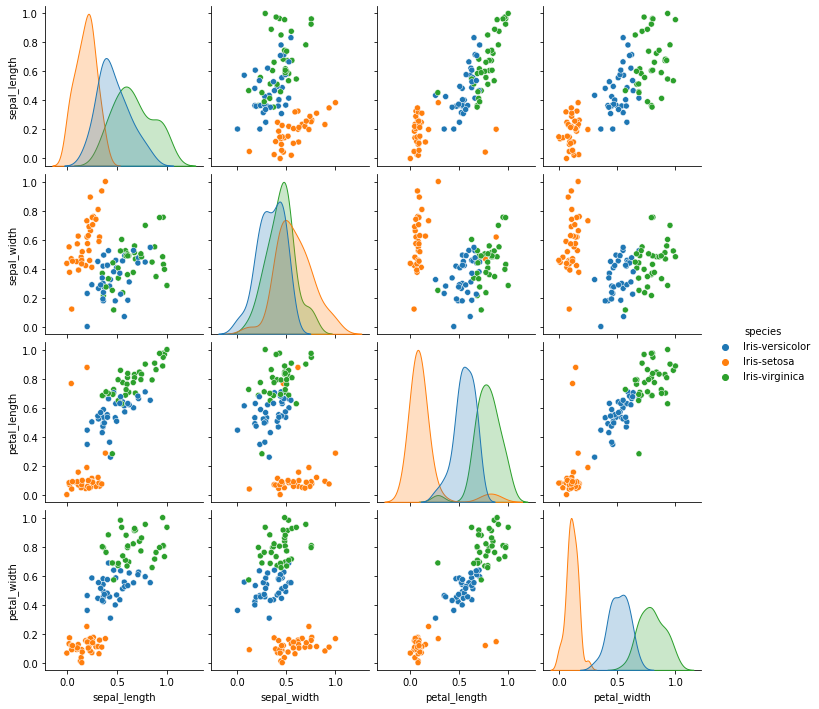

In [ ]:
# Getting Pair Plot for Iris Data in which we filled missing values by interpolation and normalized with Min Max Scaler method
sns.pairplot(iris_data_missing_interpolated_min_max_normalized, hue='species')

Getting Pair Plot for Iris Data in which we filled missing values by **interpolation** and normalized with **Z-Score** method

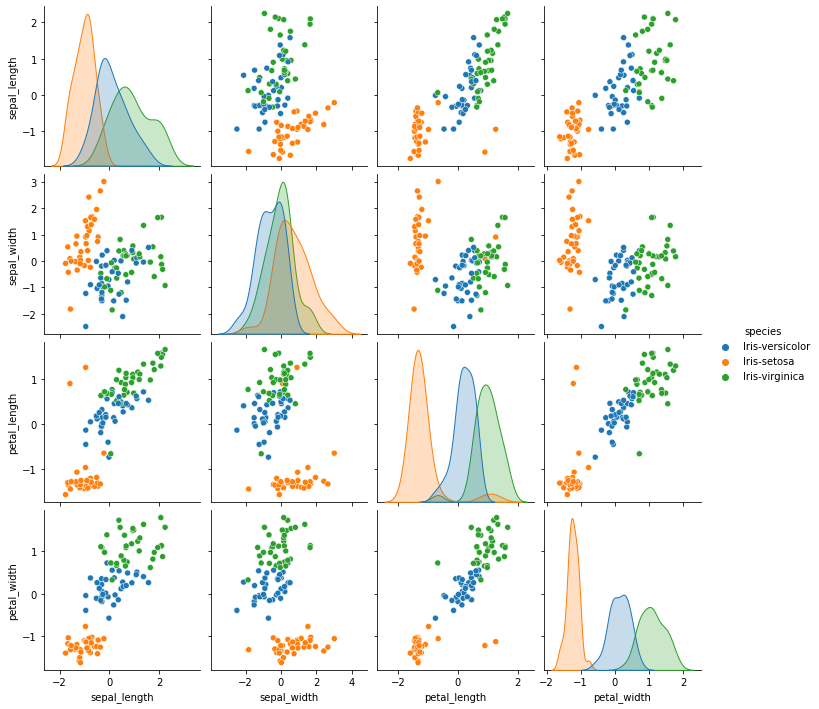

In [ ]:
# Getting Pair Plot for Iris Data in which we filled missing values by interpolation and normalized with Z-Score method
sns.pairplot(iris_data_missing_interpolated_zscore_normalized, hue='species')

# **CM2 for Heart Disease Data**

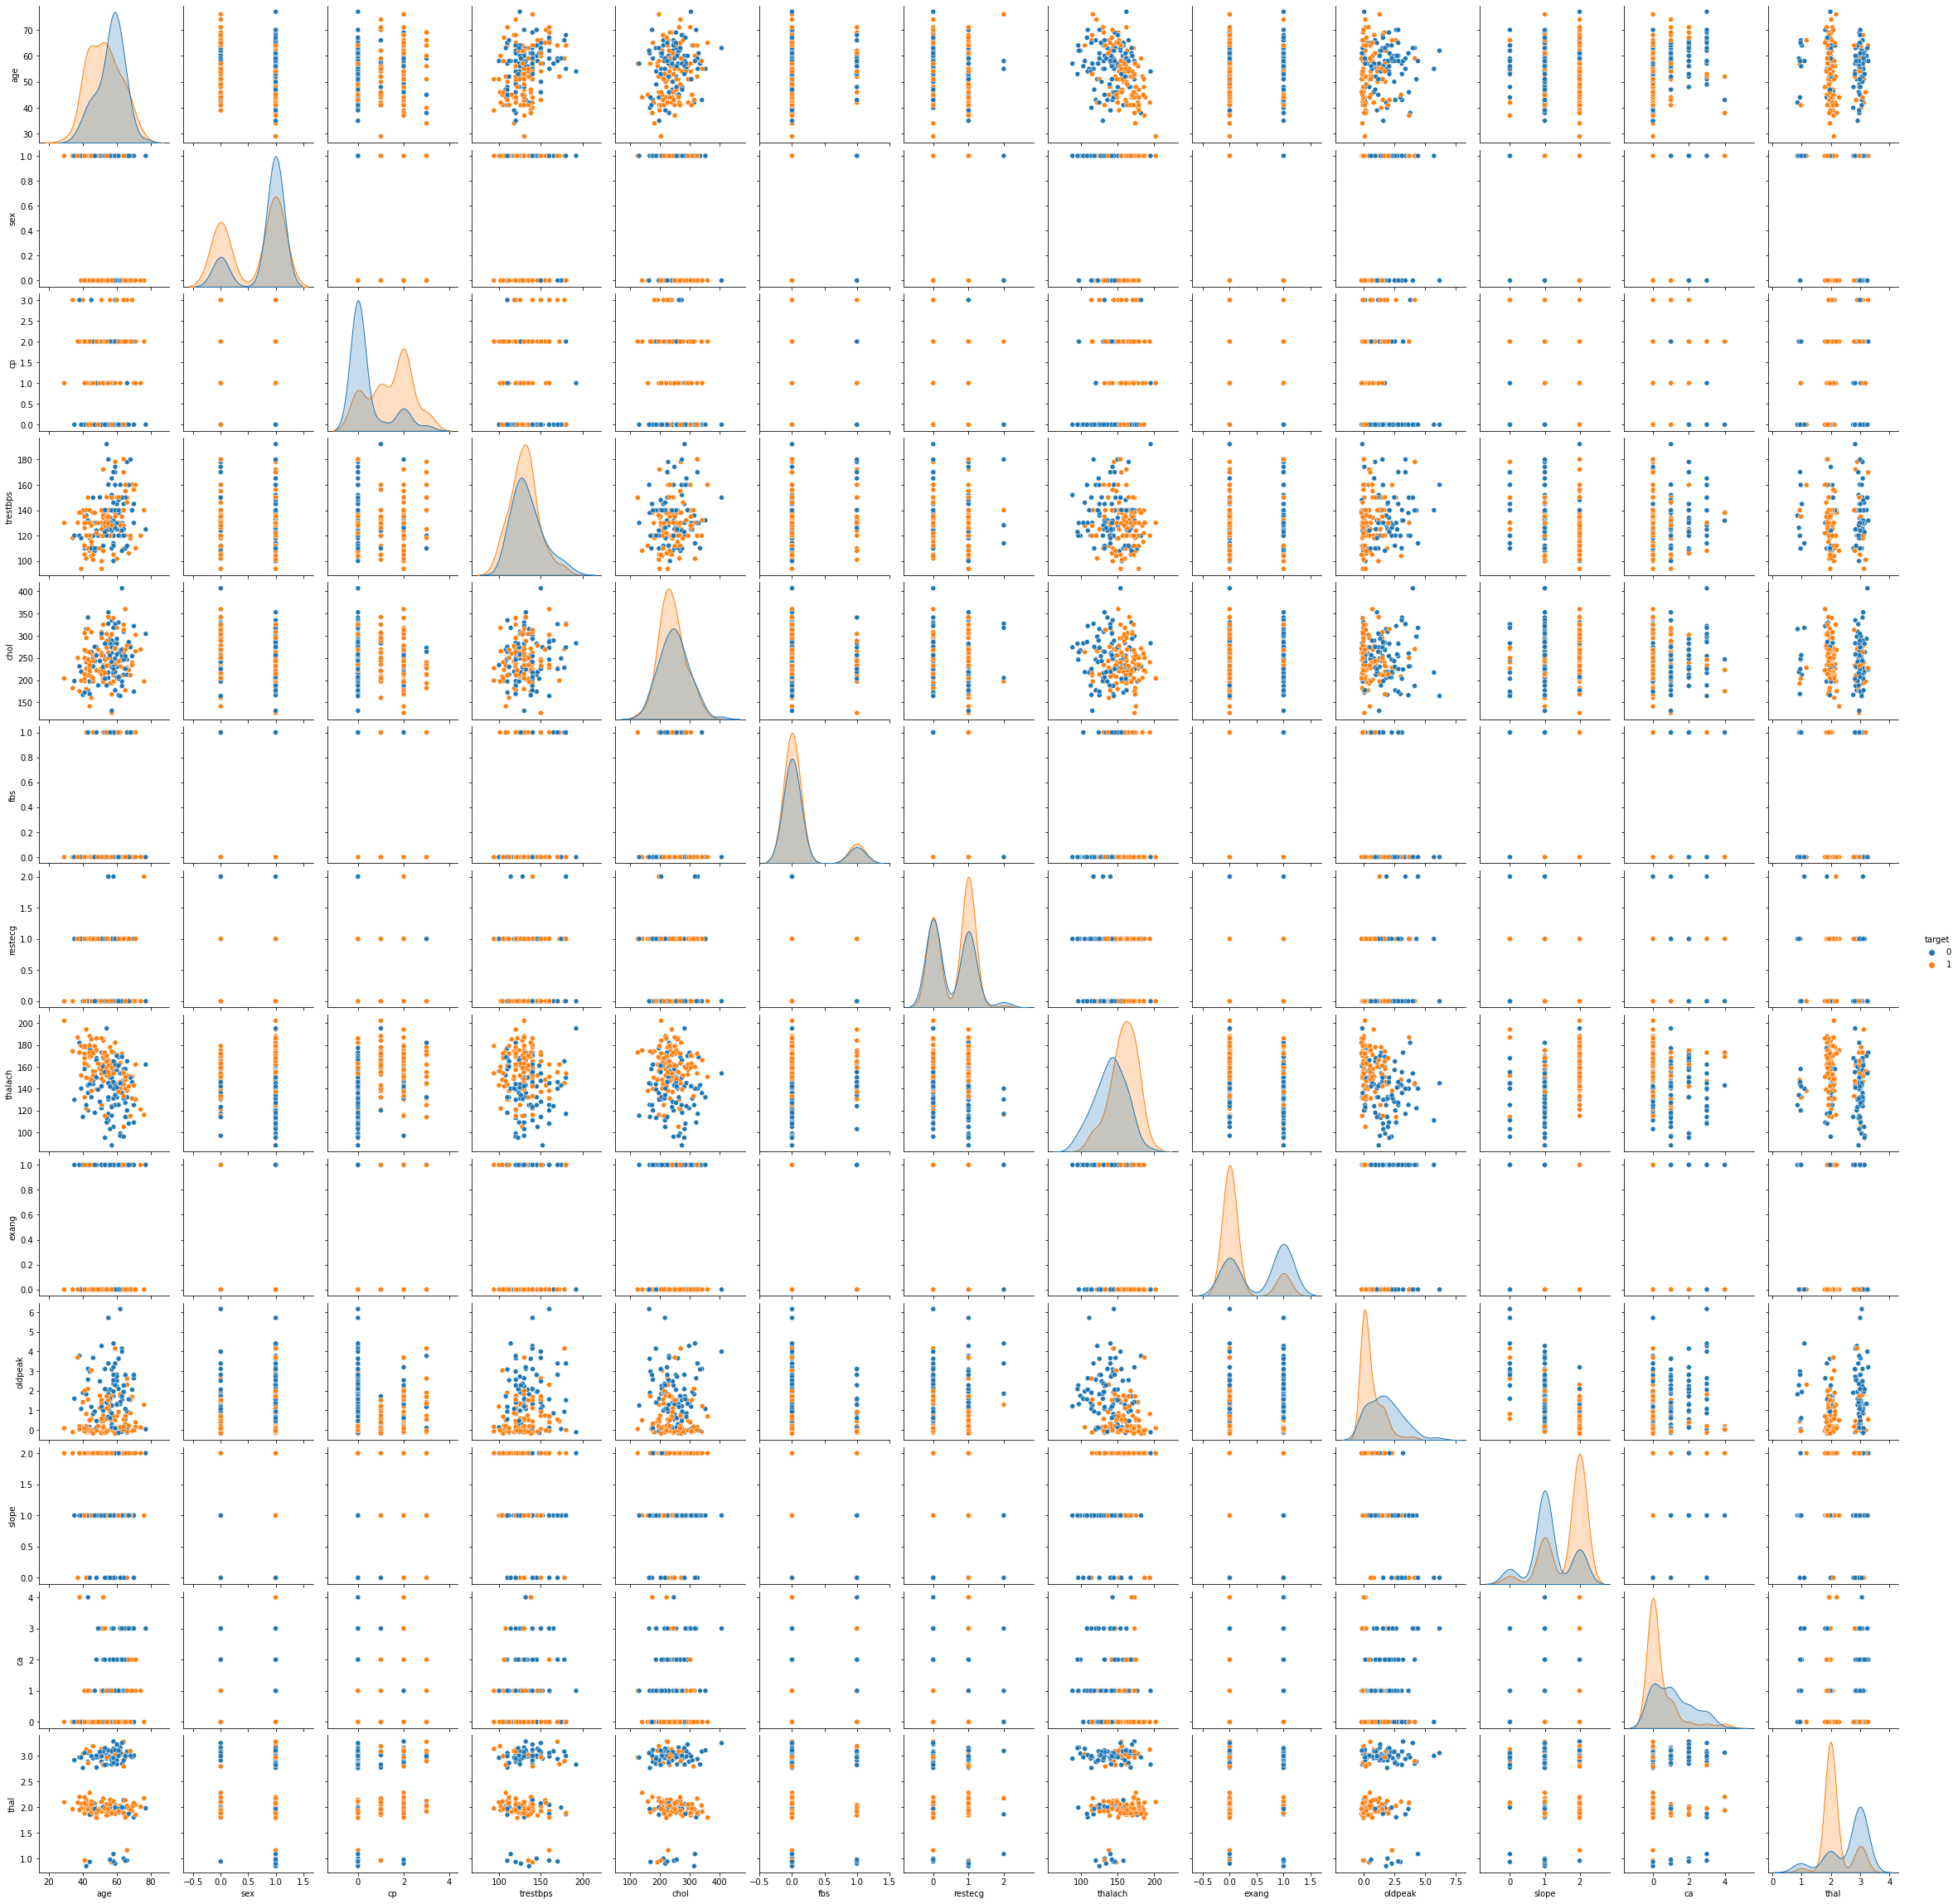

In [ ]:
sns.pairplot(heart_disease_data, hue='target')

The following are the features that we have for Heart Disease Dataset and what they mean

**chol** - cholestrol

**fbs** - fasting blood sugar

**thalach** - maximun heart rate achieved during thalium stress test

**oldpeak** - ST Depression induced by exercise relative to rest

**restecg** - resting ecg

**cp** - chest pain type

**trestbps** - resting blood pressure

**exang** - exercise induced angina

**slope** - slope of the peak exercise ST segment

**ca** - number of major vesselscoloured by flouroscopy

**thal** - thalium stress test result

**age**

**sex**


**Answer:** 

From these features, we are supposed to select a few that we will use for visualizing the pair plot of the data. 

Intuitively, age is a very important feature while talking about heart diesase. So, we will definitely include age in our group. Now, there are some other features as well which seem to be related to age here. 

Also, after zooming in on the pair plot that has all the features, it can be seen that we should observe on the following features:

age, thalach, chol, trestbps, oldpeak because these are the features that show some kind of dispersed behaviour when compared to other features in the group. Other features in the dataset, however important they seem, show constant behaviour. Therefore, there will not be any point in analyzing them any further.

These features have noteworthy pairs plot and therefore, will help us draw deeper insights. 

In [ ]:
heart_disease_data.head()

age  sex  cp    trestbps        chol  ...   oldpeak  slope  ca      thal  target
0   76    0   2  140.102822  197.105970  ...  1.284822    1.0   0  2.175904       1
1   43    0   0  132.079599  341.049462  ...  3.110483    1.0   0  3.082071       0
2   47    1   2  107.899290  242.822816  ... -0.023723    2.0   0  2.020827       0
3   51    1   2   99.934001         NaN  ...  1.195082    1.0   0  2.100312       1
4   57    1   0  110.103508  334.952353  ...  3.082052    1.0   1  2.831509       0

[5 rows x 14 columns]

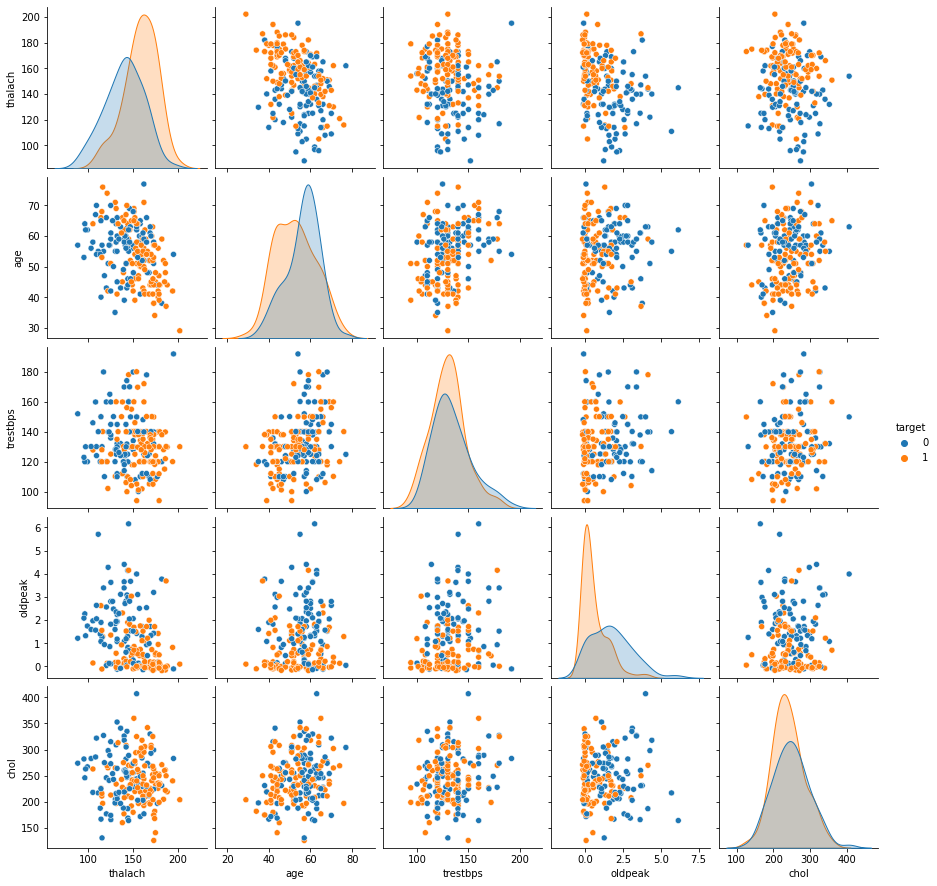

In [ ]:
sns.pairplot(heart_disease_data[{"age", "thalach", "chol", "trestbps", "oldpeak", "target"}], hue='target')

Pair Plot for Heart Disease Data with selected features for daatframe where the rows with **missing values were dropped**

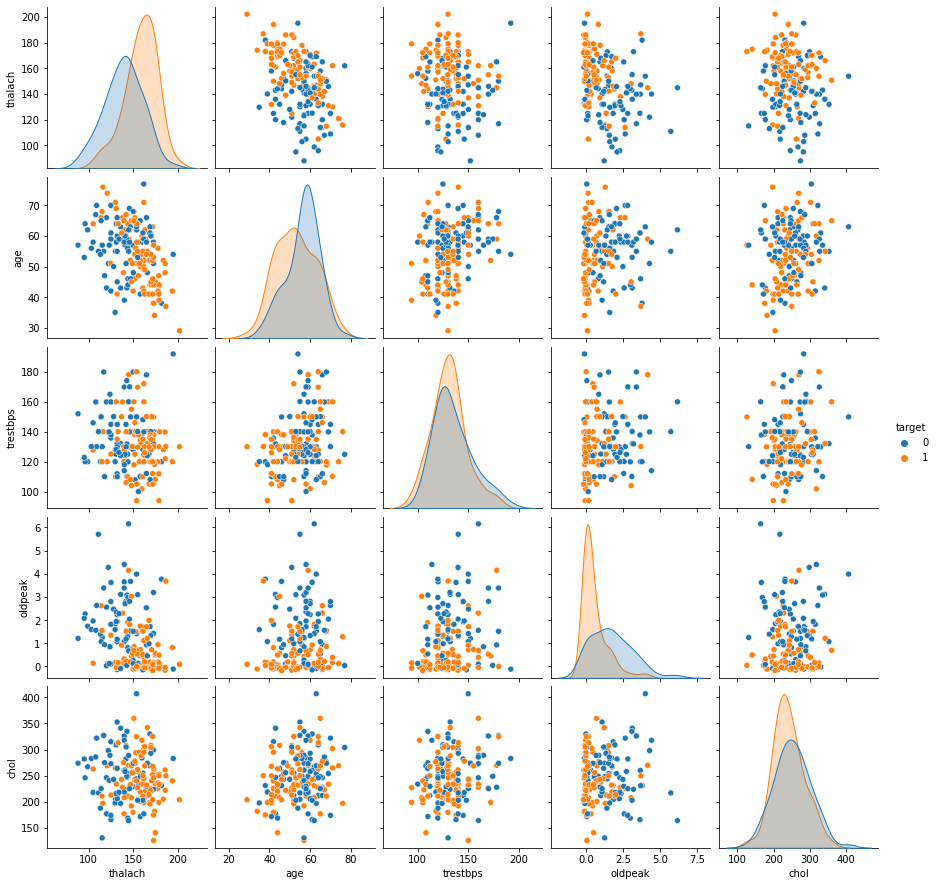

In [ ]:
sns.pairplot(heart_disease_data_dropped_missing_rows[{"age", "thalach", "chol", "trestbps", "oldpeak", "target"}], hue='target')

Pair Plot for Heart Disease Data with selected features for dataframe where the rows with **missing values were dropped** and then normalized with **Min Max Scaler** method

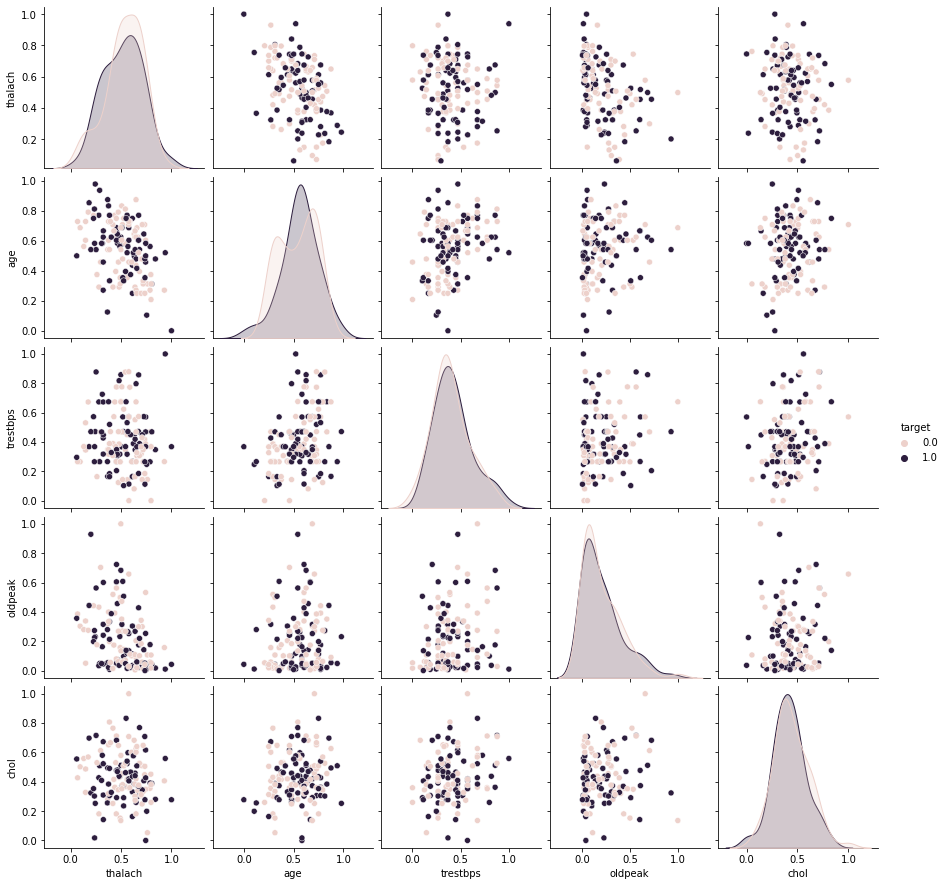

In [ ]:
sns.pairplot(heart_disease_data_dropped_missing_rows_min_max_normalized[{"age", "thalach", "chol", "trestbps", "oldpeak", "target"}], hue='target')

Pair Plot for Heart Disease Data with selected features for dataframe where the rows with **missing values were dropped **and then normalized with **Z-Score** method

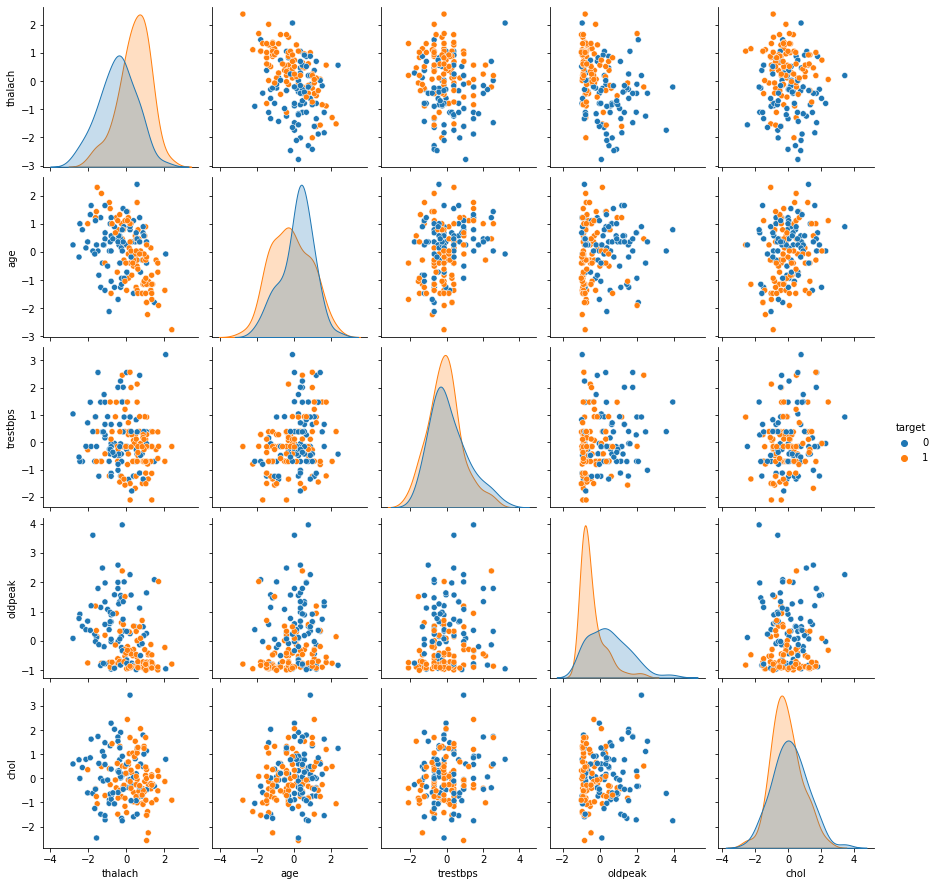

In [ ]:
sns.pairplot(heart_disease_data_dropped_missing_rows_zscore_normalized[{"age", "thalach", "chol", "trestbps", "oldpeak", "target"}], hue='target')

Pair plot for Heart Disease Data with few selected features where the missing values are filled using **approximation** (mean)

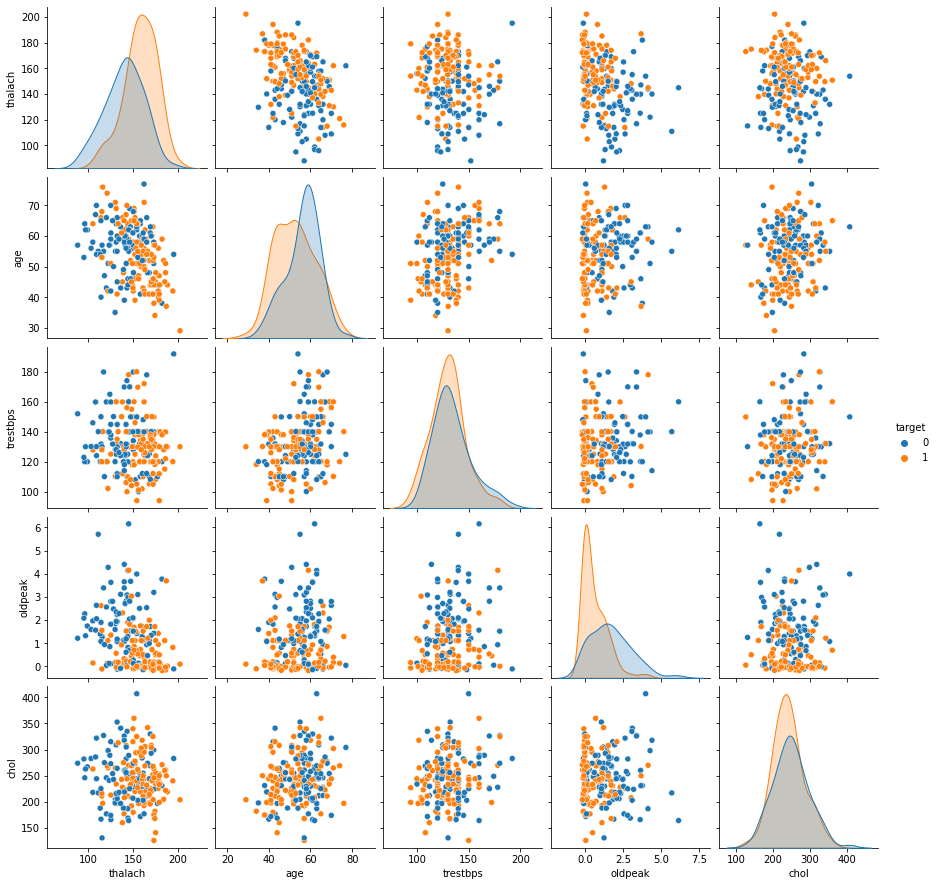

In [ ]:
sns.pairplot(heart_disease_data_mean_approximated[{"age", "thalach", "chol", "trestbps", "oldpeak", "target"}], hue='target')

Pair plot for Heart Disease Data with few selected features where the missing values are filled using **approximation** (mean) and then normalized with **Min Max Scaler** method

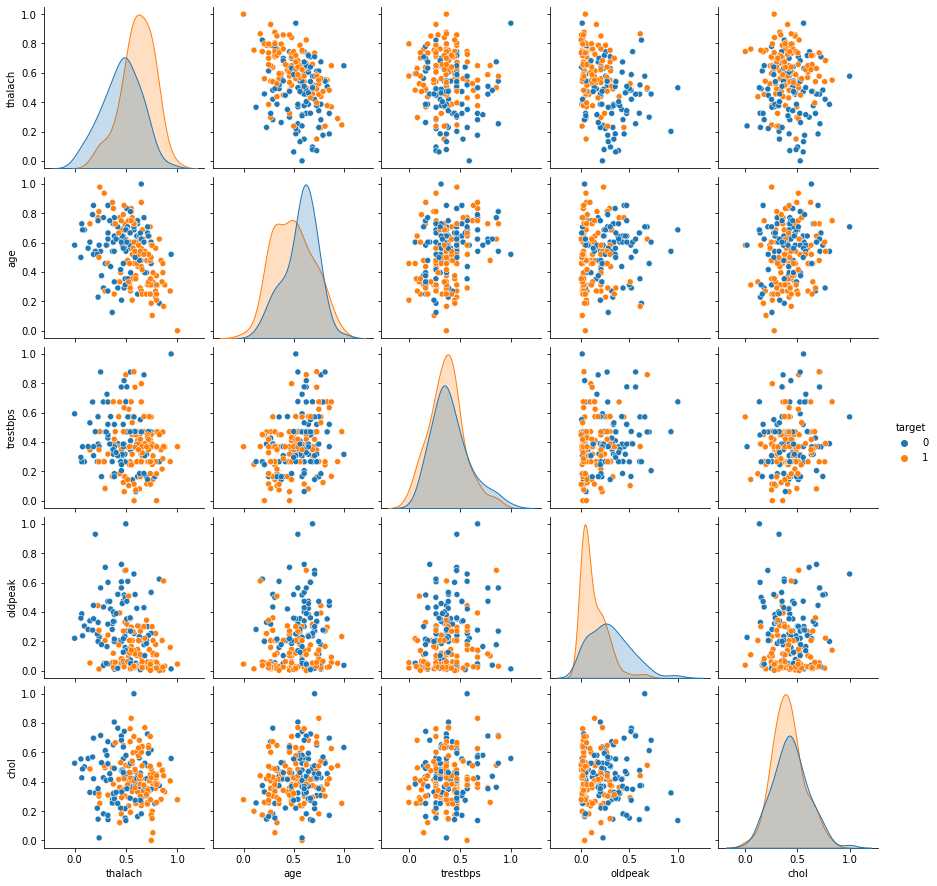

In [ ]:
sns.pairplot(heart_disease_data_mean_approximated_min_max_normalized[{"age", "thalach", "chol", "trestbps", "oldpeak", "target"}], hue='target')

Pair plot for Heart Disease Data with few selected features where the missing values are filled using **approximation** (mean) and then normalized with **Z-Score** method

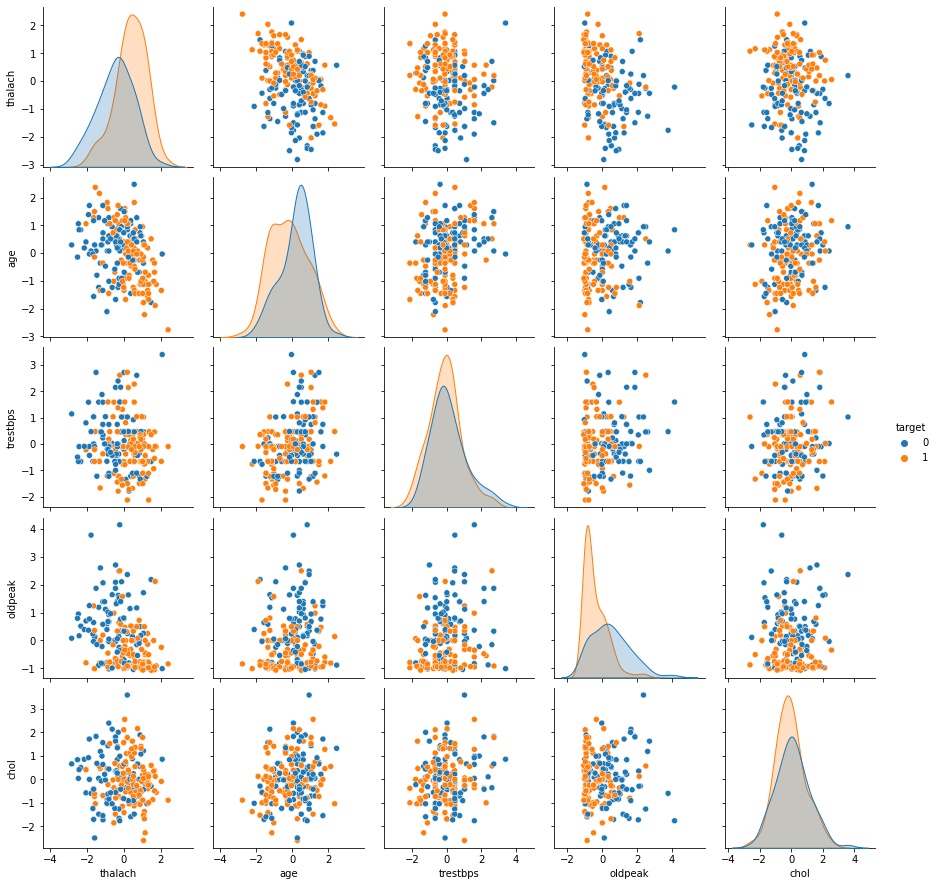

In [ ]:
sns.pairplot(heart_disease_data_mean_approximated_zscore_normalized[{"age", "thalach", "chol", "trestbps", "oldpeak", "target"}], hue='target')

Pair plot for Heart Disease Data with few selected features where the missing values are filled using **interpolation** (mean)

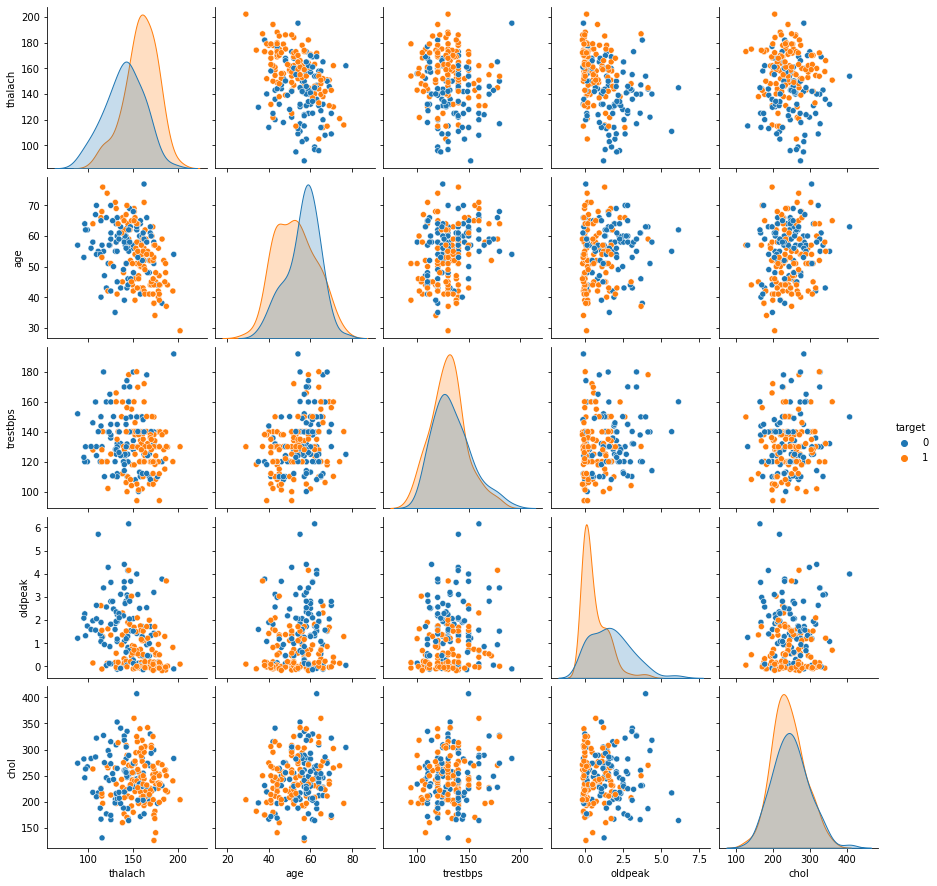

In [ ]:
sns.pairplot(heart_disease_data_missing_interpolated[{"age", "thalach", "chol", "trestbps", "oldpeak", "target"}], hue='target')

Pair plot for Heart Disease Data with few selected features where the missing values are filled using **interpolation** (mean) and then normalized using **Min Max Scaler** method

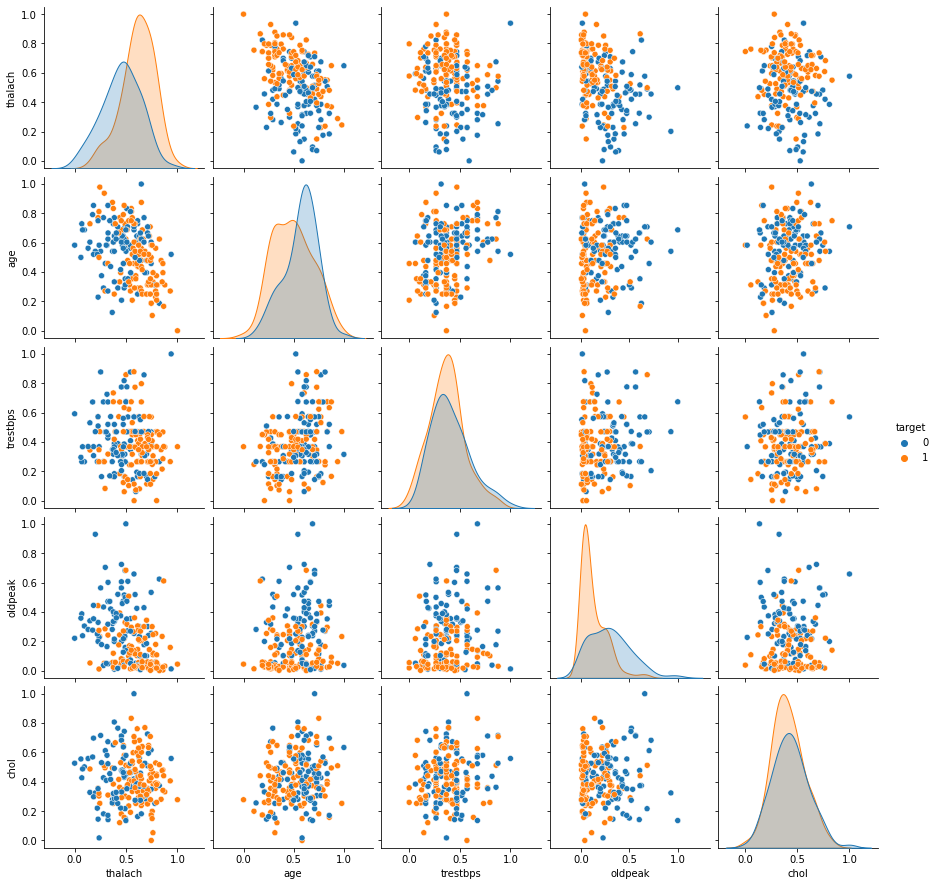

In [ ]:
sns.pairplot(heart_disease_data_missing_interpolated_min_max_normalized[{"age", "thalach", "chol", "trestbps", "oldpeak", "target"}], hue='target')

Pair plot for Heart Disease Data with few selected features where the missing values are filled using **interpolation** (mean) and then normalized using **Z-Score** method

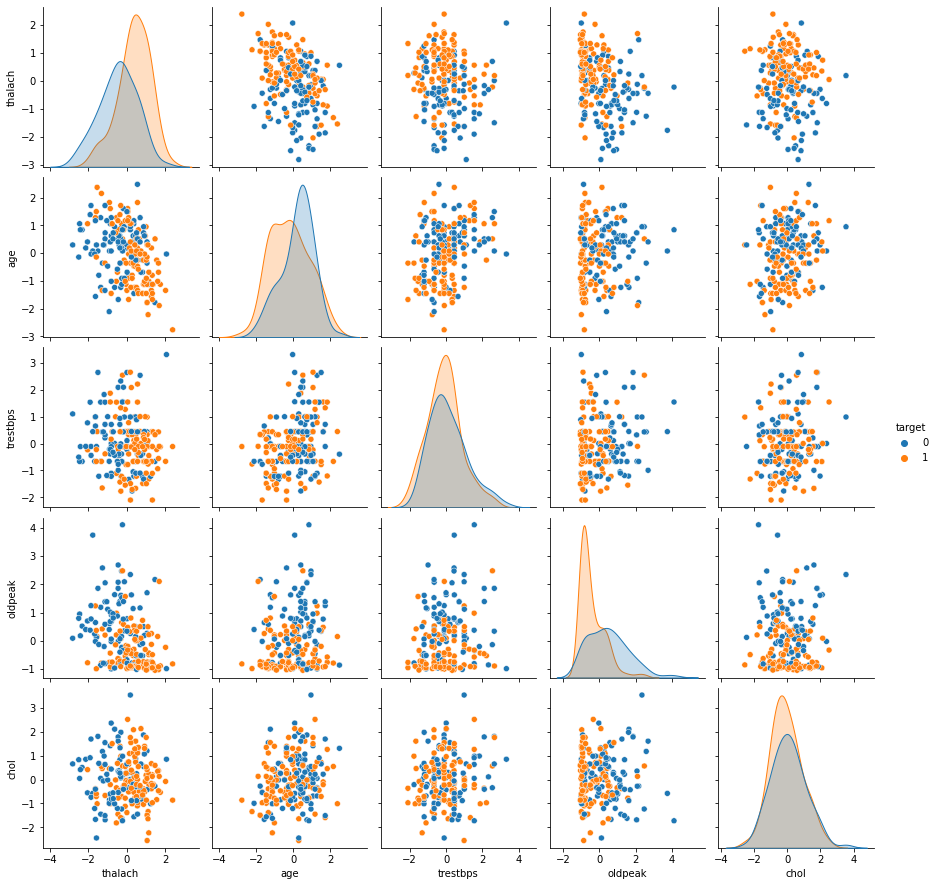

In [ ]:
sns.pairplot(heart_disease_data_missing_interpolated_zscore_normalized[{"age", "thalach", "chol", "trestbps", "oldpeak", "target"}], hue='target')

**Conclusion:** 

Here, we can see an increasing trend between some pairs of features which indicates that they are positively related (which is to say that one is directly proportional to the other). So, one would increase when the other does. However, there isn't even one pure increasing trend, only th scatter looks like it is increasing. So, there isn't a relation in direct proportion. But it is certain that, if one increases, the other would also increase, although not in equal proportion.
While some features have dispersed scatter and it is difficult to identify an increasing or decreasing trend for them. Those features are hardlyor not at all related to each other. 

The pairs plots makes it more evident that normalization brings all the values in a comparable range. Identifying a pattern becomes very easy because of that.

# **CM3 for Iris Data**

Here, we will get the **correlation coefficients** for every feature in the dataset with every other feature in the dataset. 

In [ ]:
print("Correlation coefficients for Iris Data in raw form; without handling the missing values")
iris_data.corr()

Correlation coefficients for Iris Data in raw form; without handling the missing values


sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.031792      0.880635     0.809915
sepal_width      -0.031792     1.000000     -0.285793    -0.267574
petal_length      0.880635    -0.285793      1.000000     0.958274
petal_width       0.809915    -0.267574      0.958274     1.000000

In [ ]:
print("Correlation coefficients for Iris Data where rows with missing values were dropped")
iris_data_dropped_missing_rows.corr()

Correlation coefficients for Iris Data where rows with missing values were dropped


sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.014750      0.879809     0.813983
sepal_width      -0.014750     1.000000     -0.285793    -0.252136
petal_length      0.879809    -0.285793      1.000000     0.958429
petal_width       0.813983    -0.252136      0.958429     1.000000

In [ ]:
print("Correlation coefficients for Iris Data where rows with missing values were dropped and the data was normalized using Min Max Scaler method")
iris_data_dropped_missing_rows_min_max_normalized.corr()

Correlation coefficients for Iris Data where rows with missing values were dropped and the data was normalized using Min Max Scaler method


sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.014750      0.879809     0.813983
sepal_width      -0.014750     1.000000     -0.285793    -0.252136
petal_length      0.879809    -0.285793      1.000000     0.958429
petal_width       0.813983    -0.252136      0.958429     1.000000

In [ ]:
print("Correlation coefficients for Iris Data where rows with missing values were dropped and the data was normalized using Z-Score method")
iris_data_dropped_missing_rows_zscore_normalized.corr()

Correlation coefficients for Iris Data where rows with missing values were dropped and the data was normalized using Z-Score method


sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.014750      0.879809     0.813983
sepal_width      -0.014750     1.000000     -0.285793    -0.252136
petal_length      0.879809    -0.285793      1.000000     0.958429
petal_width       0.813983    -0.252136      0.958429     1.000000

In [ ]:
print("Correlation coefficients for Iris Data where missing values were approximated with mean value")
iris_data_mean_approximated.corr()

Correlation coefficients for Iris Data where missing values were approximated with mean value


sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.031567      0.863919     0.809915
sepal_width      -0.031567     1.000000     -0.261689    -0.264253
petal_length      0.863919    -0.261689      1.000000     0.921109
petal_width       0.809915    -0.264253      0.921109     1.000000

In [ ]:
print("Correlation coefficients for Iris Data where missing values were approximated with mean value and the data was normalized using Min Max Scaler method")
iris_data_mean_approximated_min_max_normalized.corr()

Correlation coefficients for Iris Data where missing values were approximated with mean value and the data was normalized using Min Max Scaler method


sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.031567      0.863919     0.809915
sepal_width      -0.031567     1.000000     -0.261689    -0.264253
petal_length      0.863919    -0.261689      1.000000     0.921109
petal_width       0.809915    -0.264253      0.921109     1.000000

In [ ]:
print("Correlation coefficients for Iris Data where missing values were approximated with mean value and the data was normalized using Z-Score method")
iris_data_mean_approximated_zscore_normalized.corr()

Correlation coefficients for Iris Data where missing values were approximated with mean value and the data was normalized using Z-Score method


sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.031567      0.863919     0.809915
sepal_width      -0.031567     1.000000     -0.261689    -0.264253
petal_length      0.863919    -0.261689      1.000000     0.921109
petal_width       0.809915    -0.264253      0.921109     1.000000

In [ ]:
print("Correlation coefficients for Iris Data where missing values were filled with interpolation")
iris_data_missing_interpolated.corr()

Correlation coefficients for Iris Data where missing values were filled with interpolation


sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.026453      0.824509     0.809915
sepal_width      -0.026453     1.000000     -0.247438    -0.257475
petal_length      0.824509    -0.247438      1.000000     0.895026
petal_width       0.809915    -0.257475      0.895026     1.000000

In [ ]:
print("Correlation coefficients for Iris Data where missing values were filled with interpolation and the data was normalized using Min Max Scaler method")
iris_data_missing_interpolated_min_max_normalized.corr()

Correlation coefficients for Iris Data where missing values were filled with interpolation and the data was normalized using Min Max Scaler method


sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.026453      0.824509     0.809915
sepal_width      -0.026453     1.000000     -0.247438    -0.257475
petal_length      0.824509    -0.247438      1.000000     0.895026
petal_width       0.809915    -0.257475      0.895026     1.000000

In [ ]:
print("Correlation coefficients for Iris Data where missing values were filled with interpolation and the data was normalized using Z-Score method")
iris_data_missing_interpolated_zscore_normalized.corr()

Correlation coefficients for Iris Data where missing values were filled with interpolation and the data was normalized using Z-Score method


sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.026453      0.824509     0.809915
sepal_width      -0.026453     1.000000     -0.247438    -0.257475
petal_length      0.824509    -0.247438      1.000000     0.895026
petal_width       0.809915    -0.257475      0.895026     1.000000

**Conclusion:** 

From the above tables it can be safely concluded that every feature (variable) has correlation coefficient of 1 with itself. Which is to say that, every variable is linearly related with itself. 

Aaprt from that, if the coefficient is greater than 0, then it means that there is an increasing relation between the two variables. 
Whereas, negative correlation coefficient means that there is decreasing relation between the two variables. 

The closer the correlation coefficient is to 1, the more closely and directly related they are. On the other hand, the closer it is to -1, the more closely and indirectly related they are. 

Getting **MEAN** for all the variables.

In [ ]:
print("For Iris Data where rows with missing data were dropped")
print(iris_data_dropped_missing_rows.mean())
# for c in iris_data.columns.values[:-1]:
#   print("Mean for variable "+c+": "+str(iris_data_dropped_missing_rows[c].mean()))

print("\n\n")
print("For Iris Data where missing values were filled by approximation (mean)")
print(iris_data_mean_approximated.mean())
# for c in iris_data.columns.values[:-1]:
  # print("Mean for variable "+c+": "+str(iris_data_mean_approximated[c].mean()))

print("\n\n")
print("For Iris Data where missing data was filled by interpolation")
print(iris_data_missing_interpolated.mean())
# for c in iris_data.columns.values[:-1]:
#   print("Mean for variable "+c+": "+str(iris_data_missing_interpolated[c].mean()))

print("\n\n")
print("For Iris Data where missing values were filled by approximation (mean) and normalized with Min Max Scalar method")
print(iris_data_mean_approximated_min_max_normalized.mean())
# for c in iris_data.columns.values[:-1]:
#   print("Mean for variable "+c+": "+str(iris_data_mean_approximated_min_max_normalized[c].mean()))

print("\n\n")
print("For Iris Data where missing values were filled by approximation (mean) and normalized with Z-Score method")
print(iris_data_mean_approximated_zscore_normalized.mean())
# for c in iris_data.columns.values[:-1]:
#   print("Mean for variable "+c+": "+str(iris_data_mean_approximated_zscore_normalized[c].mean()))

For Iris Data where rows with missing data were dropped
sepal_length    5.867894
sepal_width     3.054935
petal_length    3.808118
petal_width     1.209826
dtype: float64



For Iris Data where missing values were filled by approximation (mean)
sepal_length    5.858909
sepal_width     3.059083
petal_length    3.812370
petal_width     1.199708
dtype: float64



For Iris Data where missing data was filled by interpolation
sepal_length    5.858909
sepal_width     3.060633
petal_length    3.831569
petal_width     1.199708
dtype: float64



For Iris Data where missing values were filled by approximation (mean) and normalized with Min Max Scalar method
sepal_length    0.438904
sepal_width     0.451816
petal_length    0.484579
petal_width     0.475423
dtype: float64



For Iris Data where missing values were filled by approximation (mean) and normalized with Z-Score method
sepal_length    1.596606e-15
sepal_width    -1.867446e-15
petal_length   -2.495358e-16
petal_width     1.332268e-16
dtype

Getting **Variance** for all the variables

In [ ]:
print("For Iris Data where rows with missing data were dropped")
print(iris_data_dropped_missing_rows.var())
# for c in iris_data.columns.values[:-1]:
#   print("Variance for variable "+c+": "+str(iris_data_dropped_missing_rows[c].std() ** 2))

print("\n\n")
print("For Iris Data where missing values were filled by approximation (mean)")
print(iris_data_mean_approximated.var())
# for c in iris_data.columns.values[:-1]:
#   print("Variance for variable "+c+": "+str(iris_data_mean_approximated[c].std() ** 2))

print("\n\n")
print("For Iris Data where missing data was filled by interpolation")
print(iris_data_missing_interpolated.var())
# for c in iris_data.columns.values[:-1]:
#   print("Variance for variable "+c+": "+str(iris_data_missing_interpolated[c].std() ** 2))

print("\n\n")
print("For Iris Data where missing values were filled by approximation (mean) and normalized with Min Max Scalar method")
print(iris_data_mean_approximated_min_max_normalized.var())
# for c in iris_data.columns.values[:-1]:
#   print("Variance for variable "+c+": "+str(iris_data_mean_approximated_min_max_normalized[c].std() ** 2))

print("\n\n")
print("For Iris Data where missing values were filled by approximation (mean) and normalized with Z-Score method")
print(iris_data_mean_approximated_zscore_normalized.var())
# for c in iris_data.columns.values[:-1]:
#   print("Variance for variable "+c+": "+str(iris_data_mean_approximated_zscore_normalized[c].std()** 2))

For Iris Data where rows with missing data were dropped
sepal_length    0.796147
sepal_width     0.193128
petal_length    3.281167
petal_width     0.629890
dtype: float64



For Iris Data where missing values were filled by approximation (mean)
sepal_length    0.742420
sepal_width     0.199164
petal_length    2.969171
petal_width     0.619672
dtype: float64



For Iris Data where missing data was filled by interpolation
sepal_length    0.742420
sepal_width     0.199647
petal_length    3.121691
petal_width     0.619672
dtype: float64



For Iris Data where missing values were filled by approximation (mean) and normalized with Min Max Scalar method
sepal_length    0.062319
sepal_width     0.032816
petal_length    0.090257
petal_width     0.086578
dtype: float64



For Iris Data where missing values were filled by approximation (mean) and normalized with Z-Score method
sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64


Evidently, Z-Score brings variance to 1 for every feature that was normalized using this method (here, all features).

Getting **Skew** for all the variables



What is Skewness?

Skewness of a feature is the measure of symmetry. If the skew value is negative, then the tail of its curve is longer on the left side and for positive value, it is longer on the right side. Skewness value should be 0 for normal dstribution. 

In [ ]:
print("For Iris Data where rows with missing data were dropped")
print(iris_data_dropped_missing_rows.skew())
# for c in iris_data.columns.values[:-1]:
#   print("Skew for variable "+c+": "+str(iris_data_dropped_missing_rows[c].skew()))

print("\n\n")
print("For Iris Data where missing values were filled by approximation (mean)")
print(iris_data_mean_approximated.skew())
# for c in iris_data.columns.values[:-1]:
#   print("Skew for variable "+c+": "+str(iris_data_mean_approximated[c].skew()))

print("\n\n")
print("For Iris Data where missing data was filled by interpolation")
print(iris_data_missing_interpolated.skew())
# for c in iris_data.columns.values[:-1]:
#   print("Skew for variable "+c+": "+str(iris_data_missing_interpolated[c].skew()))

print("\n\n")
print("For Iris Data where missing values were filled by approximation (mean) and normalized with Min Max Scalar method")
print(iris_data_mean_approximated_min_max_normalized.skew())
# for c in iris_data.columns.values[:-1]:
#   print("Skew for variable "+c+": "+str(iris_data_mean_approximated_min_max_normalized[c].skew()))

print("\n\n")
print("For Iris Data where missing values were filled by approximation (mean) and normalized with Z-Score method")
print(iris_data_mean_approximated_zscore_normalized.skew())
# for c in iris_data.columns.values[:-1]:
#   print("Skew for variable "+c+": "+str(iris_data_mean_approximated_zscore_normalized[c].skew()))

For Iris Data where rows with missing data were dropped
sepal_length    0.424681
sepal_width     0.186780
petal_length   -0.238250
petal_width    -0.101132
dtype: float64



For Iris Data where missing values were filled by approximation (mean)
sepal_length    0.401506
sepal_width     0.374702
petal_length   -0.265784
petal_width    -0.074751
dtype: float64



For Iris Data where missing data was filled by interpolation
sepal_length    0.401506
sepal_width     0.363281
petal_length   -0.253082
petal_width    -0.074751
dtype: float64



For Iris Data where missing values were filled by approximation (mean) and normalized with Min Max Scalar method
sepal_length    0.401506
sepal_width     0.374702
petal_length   -0.265784
petal_width    -0.074751
dtype: float64



For Iris Data where missing values were filled by approximation (mean) and normalized with Z-Score method
sepal_length    0.401506
sepal_width     0.374702
petal_length   -0.265784
petal_width    -0.074751
dtype: float64


Positive value of Skewness means that there is more data samples with value samller than the mean value. 
Negative value of Skewness means that there is more data samples with value larger than the mean value

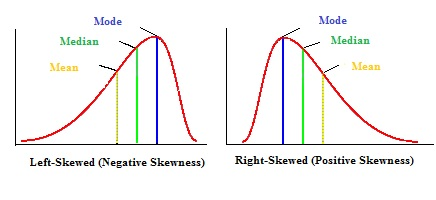

Image Source: https://www.statisticshowto.com/probability-and-statistics/skewed-distribution/

Getting **Kurtosis** for all data

What is Kurtosis?

Kurtosis is the measure of the 'tailedness' of the distribution. To put it in easier words, it is the measure of heaviness of the tail compared to the normal distribution. It is the measure of outliers present in the distribution.

Higher value of Kurtosis means that there are many outliers in the data. 

In [ ]:
print("For Iris Data where rows with missing data were dropped")
print(iris_data_dropped_missing_rows.kurtosis())
# for c in iris_data.columns.values[:-1]:
#   print("Kurtosis for variable "+c+": "+str(iris_data_dropped_missing_rows[c].kurtosis()))

print("\n\n")
print("For Iris Data where missing values were filled by approximation (mean)")
print(iris_data_mean_approximated.kurtosis())
# for c in iris_data.columns.values[:-1]:
#   print("Kurtosis for variable "+c+": "+str(iris_data_mean_approximated[c].kurtosis()))

print("\n\n")
print("For Iris Data where missing data was filled by interpolation")
print(iris_data_missing_interpolated.kurtosis())
# for c in iris_data.columns.values[:-1]:
#   print("Kurtosis for variable "+c+": "+str(iris_data_missing_interpolated[c].kurtosis()))

print("\n\n")
print("For Iris Data where missing values were filled by approximation (mean) and normalized with Min Max Scalar method")
print(iris_data_mean_approximated_min_max_normalized.kurtosis())
# for c in iris_data.columns.values[:-1]:
#   print("Kurtosis for variable "+c+": "+str(iris_data_mean_approximated_min_max_normalized[c].kurtosis()))

print("\n\n")
print("For Iris Data where missing values were filled by approximation (mean) and normalized with Z-Score method")
print(iris_data_mean_approximated_zscore_normalized.kurtosis())
# for c in iris_data.columns.values[:-1]:
#   print("Kurtosis for variable "+c+": "+str(iris_data_mean_approximated_zscore_normalized[c].kurtosis()))

For Iris Data where rows with missing data were dropped
sepal_length   -0.677755
sepal_width     0.326975
petal_length   -1.412103
petal_width    -1.319590
dtype: float64



For Iris Data where missing values were filled by approximation (mean)
sepal_length   -0.544820
sepal_width     0.649582
petal_length   -1.248929
petal_width    -1.315451
dtype: float64



For Iris Data where missing data was filled by interpolation
sepal_length   -0.544820
sepal_width     0.626489
petal_length   -1.364572
petal_width    -1.315451
dtype: float64



For Iris Data where missing values were filled by approximation (mean) and normalized with Min Max Scalar method
sepal_length   -0.544820
sepal_width     0.649582
petal_length   -1.248929
petal_width    -1.315451
dtype: float64



For Iris Data where missing values were filled by approximation (mean) and normalized with Z-Score method
sepal_length   -0.544820
sepal_width     0.649582
petal_length   -1.248929
petal_width    -1.315451
dtype: float64


Kurtosis = 0 ==> Normal distribution

Kurtosis > 0 ==> The tail is heavy. It has more values near the exremes. (probably more outliers)

Kurtosis < 0 ==> The tail is thin. It has less values near the extremes. (probably less outliers)

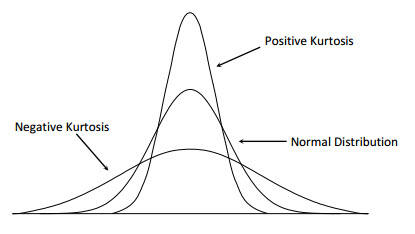


Image Source: https://stats.stackexchange.com/questions/84158/how-is-the-kurtosis-of-a-distribution-related-to-the-geometry-of-the-density-fun

Skewness and Kurtosis are the two measures used to measure the shape of the curve (distribution). 

# **CM3 for Heart Disease Dataset**

Getting **Correlation Coefficient** for all data

In [ ]:
print("Correlation coefficients for Heart Disease Data in raw form; without handling the missing values")
heart_disease_data.corr()

Correlation coefficients for Heart Disease Data in raw form; without handling the missing values


age       sex        cp  ...        ca      thal    target
age       1.000000 -0.140074 -0.084230  ...  0.266278  0.049743 -0.196967
sex      -0.140074  1.000000 -0.057939  ...  0.120466  0.208391 -0.249428
cp       -0.084230 -0.057939  1.000000  ... -0.180350 -0.141699  0.490819
trestbps  0.335944 -0.049906 -0.007449  ...  0.080824  0.022495 -0.118476
chol      0.185861 -0.195213 -0.061591  ...  0.037820 -0.032143 -0.078063
fbs       0.050823  0.081750  0.057205  ...  0.128097  0.009830 -0.005276
restecg  -0.124819 -0.050203  0.035935  ... -0.079777 -0.028263  0.087048
thalach  -0.382280  0.017446  0.246019  ... -0.177231 -0.147013  0.415354
exang     0.114545  0.122773 -0.349369  ...  0.101805  0.187304 -0.450321
oldpeak   0.131735  0.098912 -0.187518  ...  0.194648  0.216788 -0.454241
slope    -0.117989 -0.057160  0.156145  ... -0.084256 -0.180782  0.419238
ca        0.266278  0.120466 -0.180350  ...  1.000000  0.134459 -0.338780
thal      0.049743  0.208391 -0.141699  ...  0.134459  1.000000 -0.367561
target   -0.196967 -0.249428  0.490819  ... -0.338780 -0.367561  1.000000

[14 rows x 14 columns]

In [ ]:
print("Correlation coefficients for Heart Disease Data where rows with missing values were dropped")
heart_disease_data_dropped_missing_rows.corr()

Correlation coefficients for Heart Disease Data where rows with missing values were dropped


age       sex        cp  ...        ca      thal    target
age       1.000000 -0.162805 -0.094568  ...  0.260586  0.031341 -0.177700
sex      -0.162805  1.000000 -0.058450  ...  0.146411  0.235369 -0.249585
cp       -0.094568 -0.058450  1.000000  ... -0.207397 -0.157975  0.531465
trestbps  0.311194 -0.080464 -0.008539  ...  0.072259  0.022846 -0.117806
chol      0.184968 -0.198022 -0.078022  ...  0.038942  0.004097 -0.114501
fbs       0.058412  0.047452  0.053333  ...  0.109652  0.021199  0.010362
restecg  -0.104239 -0.072782 -0.030776  ... -0.081353 -0.006021  0.067840
thalach  -0.418467 -0.051201  0.288617  ... -0.192047 -0.116345  0.438963
exang     0.117830  0.090487 -0.396391  ...  0.079687  0.167880 -0.449802
oldpeak   0.132613  0.103859 -0.177998  ...  0.156793  0.185610 -0.456554
slope    -0.151080 -0.098354  0.184471  ... -0.080760 -0.160397  0.427994
ca        0.260586  0.146411 -0.207397  ...  1.000000  0.112082 -0.307917
thal      0.031341  0.235369 -0.157975  ...  0.112082  1.000000 -0.352234
target   -0.177700 -0.249585  0.531465  ... -0.307917 -0.352234  1.000000

[14 rows x 14 columns]

In [ ]:
print("Correlation coefficients for Heart Disease Data where rows with missing values were dropped and the data was normalized using Min Max Scaler method")
heart_disease_data_dropped_missing_rows_min_max_normalized.corr()

Correlation coefficients for Heart Disease Data where rows with missing values were dropped and the data was normalized using Min Max Scaler method


age       sex        cp  ...        ca      thal    target
age       1.000000 -0.162805 -0.094568  ...  0.260586  0.031341  0.064758
sex      -0.162805  1.000000 -0.058450  ...  0.146411  0.235369  0.065478
cp       -0.094568 -0.058450  1.000000  ... -0.207397 -0.157975  0.097420
trestbps  0.311194 -0.080464 -0.008539  ...  0.072259  0.022846  0.071550
chol      0.184968 -0.198022 -0.078022  ...  0.038942  0.004097 -0.067846
fbs       0.058412  0.047452  0.053333  ...  0.109652  0.021199  0.123941
restecg  -0.104239 -0.072782 -0.030776  ... -0.081353 -0.006021 -0.050476
thalach  -0.418467 -0.051201  0.288617  ... -0.192047 -0.116345 -0.032089
exang     0.117830  0.090487 -0.396391  ...  0.079687  0.167880 -0.062489
oldpeak   0.132613  0.103859 -0.177998  ...  0.156793  0.185610  0.003872
slope    -0.151080 -0.098354  0.184471  ... -0.080760 -0.160397  0.020280
ca        0.260586  0.146411 -0.207397  ...  1.000000  0.112082  0.010191
thal      0.031341  0.235369 -0.157975  ...  0.112082  1.000000 -0.201046
target    0.064758  0.065478  0.097420  ...  0.010191 -0.201046  1.000000

[14 rows x 14 columns]

In [ ]:
print("Correlation coefficients for Heart Disease Data where rows with missing values were dropped and the data was normalized using Z-Score method")
heart_disease_data_dropped_missing_rows_zscore_normalized.corr()

Correlation coefficients for Heart Disease Data where rows with missing values were dropped and the data was normalized using Z-Score method


age       sex        cp  ...        ca      thal    target
age       1.000000 -0.162805 -0.094568  ...  0.260586  0.031341 -0.177700
sex      -0.162805  1.000000 -0.058450  ...  0.146411  0.235369 -0.249585
cp       -0.094568 -0.058450  1.000000  ... -0.207397 -0.157975  0.531465
trestbps  0.311194 -0.080464 -0.008539  ...  0.072259  0.022846 -0.117806
chol      0.184968 -0.198022 -0.078022  ...  0.038942  0.004097 -0.114501
fbs       0.058412  0.047452  0.053333  ...  0.109652  0.021199  0.010362
restecg  -0.104239 -0.072782 -0.030776  ... -0.081353 -0.006021  0.067840
thalach  -0.418467 -0.051201  0.288617  ... -0.192047 -0.116345  0.438963
exang     0.117830  0.090487 -0.396391  ...  0.079687  0.167880 -0.449802
oldpeak   0.132613  0.103859 -0.177998  ...  0.156793  0.185610 -0.456554
slope    -0.151080 -0.098354  0.184471  ... -0.080760 -0.160397  0.427994
ca        0.260586  0.146411 -0.207397  ...  1.000000  0.112082 -0.307917
thal      0.031341  0.235369 -0.157975  ...  0.112082  1.000000 -0.352234
target   -0.177700 -0.249585  0.531465  ... -0.307917 -0.352234  1.000000

[14 rows x 14 columns]

In [ ]:
print("Correlation coefficients for Heart Disease Data where missing values were approximated with mean value")
heart_disease_data_mean_approximated.corr()

Correlation coefficients for Heart Disease Data where missing values were approximated with mean value


age       sex        cp  ...        ca      thal    target
age       1.000000 -0.140074 -0.084230  ...  0.266278  0.049741 -0.196967
sex      -0.140074  1.000000 -0.057939  ...  0.120466  0.207296 -0.249428
cp       -0.084230 -0.057939  1.000000  ... -0.180350 -0.141348  0.490819
trestbps  0.332031 -0.049112 -0.007334  ...  0.079936  0.021954 -0.116310
chol      0.182407 -0.190647 -0.060045  ...  0.037229 -0.031603 -0.076172
fbs       0.050823  0.081750  0.057205  ...  0.128097  0.009827 -0.005276
restecg  -0.122966 -0.049724  0.035443  ... -0.079199 -0.027866  0.086100
thalach  -0.378854  0.017298  0.243774  ... -0.176756 -0.145308  0.411685
exang     0.114545  0.122773 -0.349369  ...  0.101805  0.187071 -0.450321
oldpeak   0.128573  0.095081 -0.181857  ...  0.190010  0.212843 -0.441999
slope    -0.117534 -0.056799  0.155434  ... -0.083942 -0.179282  0.416865
ca        0.266278  0.120466 -0.180350  ...  1.000000  0.134300 -0.338780
thal      0.049741  0.207296 -0.141348  ...  0.134300  1.000000 -0.366826
target   -0.196967 -0.249428  0.490819  ... -0.338780 -0.366826  1.000000

[14 rows x 14 columns]

In [ ]:
print("Correlation coefficients for Heart Disease Data where missing values were approximated with mean value and the data was normalized using Min Max Scaler method")
heart_disease_data_mean_approximated_min_max_normalized.corr()

Correlation coefficients for Heart Disease Data where missing values were approximated with mean value and the data was normalized using Min Max Scaler method


age       sex        cp  ...        ca      thal    target
age       1.000000 -0.140074 -0.084230  ...  0.266278  0.049741 -0.196967
sex      -0.140074  1.000000 -0.057939  ...  0.120466  0.207296 -0.249428
cp       -0.084230 -0.057939  1.000000  ... -0.180350 -0.141348  0.490819
trestbps  0.332031 -0.049112 -0.007334  ...  0.079936  0.021954 -0.116310
chol      0.182407 -0.190647 -0.060045  ...  0.037229 -0.031603 -0.076172
fbs       0.050823  0.081750  0.057205  ...  0.128097  0.009827 -0.005276
restecg  -0.122966 -0.049724  0.035443  ... -0.079199 -0.027866  0.086100
thalach  -0.378854  0.017298  0.243774  ... -0.176756 -0.145308  0.411685
exang     0.114545  0.122773 -0.349369  ...  0.101805  0.187071 -0.450321
oldpeak   0.128573  0.095081 -0.181857  ...  0.190010  0.212843 -0.441999
slope    -0.117534 -0.056799  0.155434  ... -0.083942 -0.179282  0.416865
ca        0.266278  0.120466 -0.180350  ...  1.000000  0.134300 -0.338780
thal      0.049741  0.207296 -0.141348  ...  0.134300  1.000000 -0.366826
target   -0.196967 -0.249428  0.490819  ... -0.338780 -0.366826  1.000000

[14 rows x 14 columns]

In [ ]:
print("Correlation coefficients for Heart Disease Data where missing values were approximated with mean value and the data was normalized using Z-Score method")
heart_disease_data_mean_approximated_zscore_normalized.corr()

Correlation coefficients for Heart Disease Data where missing values were approximated with mean value and the data was normalized using Z-Score method


age       sex        cp  ...        ca      thal    target
age       1.000000 -0.140074 -0.084230  ...  0.266278  0.049741 -0.196967
sex      -0.140074  1.000000 -0.057939  ...  0.120466  0.207296 -0.249428
cp       -0.084230 -0.057939  1.000000  ... -0.180350 -0.141348  0.490819
trestbps  0.332031 -0.049112 -0.007334  ...  0.079936  0.021954 -0.116310
chol      0.182407 -0.190647 -0.060045  ...  0.037229 -0.031603 -0.076172
fbs       0.050823  0.081750  0.057205  ...  0.128097  0.009827 -0.005276
restecg  -0.122966 -0.049724  0.035443  ... -0.079199 -0.027866  0.086100
thalach  -0.378854  0.017298  0.243774  ... -0.176756 -0.145308  0.411685
exang     0.114545  0.122773 -0.349369  ...  0.101805  0.187071 -0.450321
oldpeak   0.128573  0.095081 -0.181857  ...  0.190010  0.212843 -0.441999
slope    -0.117534 -0.056799  0.155434  ... -0.083942 -0.179282  0.416865
ca        0.266278  0.120466 -0.180350  ...  1.000000  0.134300 -0.338780
thal      0.049741  0.207296 -0.141348  ...  0.134300  1.000000 -0.366826
target   -0.196967 -0.249428  0.490819  ... -0.338780 -0.366826  1.000000

[14 rows x 14 columns]

In [ ]:
print("Correlation coefficients for Heart Disease Data where missing values were filled with interpolation")
heart_disease_data_missing_interpolated.corr()

Correlation coefficients for Heart Disease Data where missing values were filled with interpolation


age       sex        cp  ...        ca      thal    target
age       1.000000 -0.140074 -0.084230  ...  0.266278  0.048985 -0.196967
sex      -0.140074  1.000000 -0.057939  ...  0.120466  0.200132 -0.249428
cp       -0.084230 -0.057939  1.000000  ... -0.180350 -0.136428  0.490819
trestbps  0.318457 -0.049125 -0.008003  ...  0.068974  0.000932 -0.107400
chol      0.163386 -0.185987 -0.046192  ...  0.039647 -0.034989 -0.066440
fbs       0.050823  0.081750  0.057205  ...  0.128097  0.008044 -0.005276
restecg  -0.122843 -0.050154  0.035176  ... -0.078513 -0.041357  0.084335
thalach  -0.383527  0.014529  0.247382  ... -0.179542 -0.158275  0.418747
exang     0.114545  0.122773 -0.349369  ...  0.101805  0.183395 -0.450321
oldpeak   0.131899  0.100760 -0.185196  ...  0.205430  0.207262 -0.444450
slope    -0.112633 -0.054599  0.151594  ... -0.078255 -0.169963  0.410606
ca        0.266278  0.120466 -0.180350  ...  1.000000  0.130825 -0.338780
thal      0.048985  0.200132 -0.136428  ...  0.130825  1.000000 -0.361888
target   -0.196967 -0.249428  0.490819  ... -0.338780 -0.361888  1.000000

[14 rows x 14 columns]

In [ ]:
print("Correlation coefficients for Heart Disease Data where missing values were filled with interpolation and the data was normalized using Min Max Scaler method")
heart_disease_data_missing_interpolated_min_max_normalized.corr()

Correlation coefficients for Heart Disease Data where missing values were filled with interpolation and the data was normalized using Min Max Scaler method


age       sex        cp  ...        ca      thal    target
age       1.000000 -0.140074 -0.084230  ...  0.266278  0.048985 -0.196967
sex      -0.140074  1.000000 -0.057939  ...  0.120466  0.200132 -0.249428
cp       -0.084230 -0.057939  1.000000  ... -0.180350 -0.136428  0.490819
trestbps  0.318457 -0.049125 -0.008003  ...  0.068974  0.000932 -0.107400
chol      0.163386 -0.185987 -0.046192  ...  0.039647 -0.034989 -0.066440
fbs       0.050823  0.081750  0.057205  ...  0.128097  0.008044 -0.005276
restecg  -0.122843 -0.050154  0.035176  ... -0.078513 -0.041357  0.084335
thalach  -0.383527  0.014529  0.247382  ... -0.179542 -0.158275  0.418747
exang     0.114545  0.122773 -0.349369  ...  0.101805  0.183395 -0.450321
oldpeak   0.131899  0.100760 -0.185196  ...  0.205430  0.207262 -0.444450
slope    -0.112633 -0.054599  0.151594  ... -0.078255 -0.169963  0.410606
ca        0.266278  0.120466 -0.180350  ...  1.000000  0.130825 -0.338780
thal      0.048985  0.200132 -0.136428  ...  0.130825  1.000000 -0.361888
target   -0.196967 -0.249428  0.490819  ... -0.338780 -0.361888  1.000000

[14 rows x 14 columns]

In [ ]:
print("Correlation coefficients for Heart Disease Data where missing values were filled with interpolation and the data was normalized using Z-Score method")
heart_disease_data_missing_interpolated_zscore_normalized.corr()

Correlation coefficients for Heart Disease Data where missing values were filled with interpolation and the data was normalized using Z-Score method


age       sex        cp  ...        ca      thal    target
age       1.000000 -0.140074 -0.084230  ...  0.266278  0.048985 -0.196967
sex      -0.140074  1.000000 -0.057939  ...  0.120466  0.200132 -0.249428
cp       -0.084230 -0.057939  1.000000  ... -0.180350 -0.136428  0.490819
trestbps  0.318457 -0.049125 -0.008003  ...  0.068974  0.000932 -0.107400
chol      0.163386 -0.185987 -0.046192  ...  0.039647 -0.034989 -0.066440
fbs       0.050823  0.081750  0.057205  ...  0.128097  0.008044 -0.005276
restecg  -0.122843 -0.050154  0.035176  ... -0.078513 -0.041357  0.084335
thalach  -0.383527  0.014529  0.247382  ... -0.179542 -0.158275  0.418747
exang     0.114545  0.122773 -0.349369  ...  0.101805  0.183395 -0.450321
oldpeak   0.131899  0.100760 -0.185196  ...  0.205430  0.207262 -0.444450
slope    -0.112633 -0.054599  0.151594  ... -0.078255 -0.169963  0.410606
ca        0.266278  0.120466 -0.180350  ...  1.000000  0.130825 -0.338780
thal      0.048985  0.200132 -0.136428  ...  0.130825  1.000000 -0.361888
target   -0.196967 -0.249428  0.490819  ... -0.338780 -0.361888  1.000000

[14 rows x 14 columns]

From all the above correlation matrices, we can see that the coefficients for features that we chose for Pairs Plot give us better insights compared to the others. 

However, none of the coefficients is more than 0.5, nor is any less than -0.5.So, this says that the features aren't that closely related. Nevertheless, them being positiveand negative does help us know the trend - increasing or decreasing. 

Closely observing the features 'age', 'thalach', 'chol', 'trestbps', 'oldpeak' in the above tables, we can see that these are the five features that have significant correlation coefficients with each other compared to the other features that are not in this list. The correlation coefficients for even these features are not so insightful, but at least they are much better than others. Here also the same rule applies, if coefficient is positive, the other would increase with the first one and if it is negative, the other would decrease when the first one increases and vice versa. 

Getting **Mean** for all data

In [ ]:
print("For Heart Disease Data where rows with missing data were dropped")
print(heart_disease_data_dropped_missing_rows.mean())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Mean for variable "+c+": "+str(heart_disease_data_dropped_missing_rows[c].mean()))

print("\n\n")
print("For Heart Disease Data where missing values were filled by approximation (mean)")
print(heart_disease_data_mean_approximated.mean())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Mean for variable "+c+": "+str(heart_disease_data_mean_approximated[c].mean()))

print("\n\n")
print("For Heart Disease Data where missing data was filled by interpolation")
print(heart_disease_data_missing_interpolated.mean())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Mean for variable "+c+": "+str(heart_disease_data_missing_interpolated[c].mean()))

print("\n\n")
print("For Heart Disease Data where missing values were filled by approximation (mean) and normalized with Min Max Scalar method")
print(heart_disease_data_mean_approximated_min_max_normalized.mean())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Mean for variable "+c+": "+str(heart_disease_data_mean_approximated_min_max_normalized[c].mean()))

print("\n\n")
print("For Heart Disease Data where missing values were filled by approximation (mean) and normalized with Z-Score method")
print(heart_disease_data_mean_approximated_zscore_normalized.mean())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Mean for variable "+c+": "+str(heart_disease_data_mean_approximated_zscore_normalized[c].mean()))

For Heart Disease Data where rows with missing data were dropped
age          54.649425
sex           0.695402
cp            0.948276
trestbps    132.852160
chol        246.142975
fbs           0.137931
restecg       0.563218
thalach     149.446186
exang         0.367816
oldpeak       1.096423
slope         1.396552
ca            0.747126
thal          2.351880
target        0.528736
dtype: float64



For Heart Disease Data where missing values were filled by approximation (mean)
age          54.311321
sex           0.688679
cp            0.957547
trestbps    131.784610
chol        244.133256
fbs           0.132075
restecg       0.560386
thalach     149.647978
exang         0.344340
oldpeak       1.113106
slope         1.423810
ca            0.731132
thal          2.349112
target        0.542453
dtype: float64



For Heart Disease Data where missing data was filled by interpolation
age          54.311321
sex           0.688679
cp            0.957547
trestbps    131.991243
chol        2

Getting **Variance** for all data

In [ ]:
print("For Heart Disease Data where rows with missing data were dropped")
print(heart_disease_data_dropped_missing_rows.var())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Variance for variable "+c+": "+str(heart_disease_data_dropped_missing_rows[c].std()** 2))

print("\n\n")
print("For Heart Disease Data where missing values were filled by approximation (mean)")
print(heart_disease_data_mean_approximated.var())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Variance for variable "+c+": "+str(heart_disease_data_mean_approximated[c].std()** 2))

print("\n\n")
print("For Heart Disease Data where missing data was filled by interpolation")
print(heart_disease_data_missing_interpolated.var())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Variance for variable "+c+": "+str(heart_disease_data_missing_interpolated[c].std()** 2))

print("\n\n")
print("For Heart Disease Data where missing values were filled by approximation (mean) and normalized with Min Max Scalar method")
print(heart_disease_data_mean_approximated_min_max_normalized.var())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Variance for variable "+c+": "+str(heart_disease_data_mean_approximated_min_max_normalized[c].std()** 2))

print("\n\n")
print("For Heart Disease Data where missing values were filled by approximation (mean) and normalized with Z-Score method")
print(heart_disease_data_mean_approximated_zscore_normalized.var())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Variance for variable "+c+": "+str(heart_disease_data_mean_approximated_zscore_normalized[c].std()** 2))

For Heart Disease Data where rows with missing data were dropped
age           86.032456
sex            0.213042
cp             1.031991
trestbps     339.996048
chol        2166.138231
fbs            0.119593
restecg        0.293668
thalach      486.627883
exang          0.233872
oldpeak        1.638076
slope          0.402531
ca             1.161119
thal           0.376951
target         0.250615
dtype: float64



For Heart Disease Data where missing values were filled by approximation (mean)
age           83.637217
sex            0.215416
cp             1.045583
trestbps     315.246012
chol        2054.838289
fbs            0.115175
restecg        0.279598
thalach      478.119819
exang          0.226840
oldpeak        1.487599
slope          0.385218
ca             1.079026
thal           0.360827
target         0.249374
dtype: float64



For Heart Disease Data where missing data was filled by interpolation
age           83.637217
sex            0.215416
cp             1.045583
trest

Getting **Skew** for all data

In [ ]:
print("For Heart Disease Data where rows with missing data were dropped")
print(heart_disease_data_dropped_missing_rows.skew())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Skew for variable "+c+": "+str(heart_disease_data_dropped_missing_rows[c].skew()))

print("\n\n")
print("For Heart Disease Data where missing values were filled by approximation (mean)")
print(heart_disease_data_mean_approximated.skew())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Skew for variable "+c+": "+str(heart_disease_data_mean_approximated[c].skew()))

print("\n\n")
print("For Heart Disease Data where missing data was filled by interpolation")
print(heart_disease_data_missing_interpolated.skew())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Skew for variable "+c+": "+str(heart_disease_data_missing_interpolated[c].skew()))

print("\n\n")
print("For Heart Disease Data where missing values were filled by approximation (mean) and normalized with Min Max Scalar method")
print(heart_disease_data_mean_approximated_min_max_normalized.skew())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Skew for variable "+c+": "+str(heart_disease_data_mean_approximated_min_max_normalized[c].skew()))

print("\n\n")
print("For Heart Disease Data where missing values were filled by approximation (mean) and normalized with Z-Score method")
print(heart_disease_data_mean_approximated_zscore_normalized.skew())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Skew for variable "+c+": "+str(heart_disease_data_mean_approximated_zscore_normalized[c].skew()))

For Heart Disease Data where rows with missing data were dropped
age        -0.166901
sex        -0.856540
cp          0.472592
trestbps    0.685072
chol        0.308902
fbs         2.118305
restecg     0.186318
thalach    -0.379853
exang       0.553020
oldpeak     1.295699
slope      -0.565451
ca          1.389022
thal       -0.306779
target     -0.116136
dtype: float64



For Heart Disease Data where missing values were filled by approximation (mean)
age        -0.106027
sex        -0.820789
cp          0.461438
trestbps    0.683908
chol        0.341739
fbs         2.188903
restecg     0.142130
thalach    -0.397817
exang       0.659880
oldpeak     1.259699
slope      -0.606914
ca          1.377751
thal       -0.250729
target     -0.171644
dtype: float64



For Heart Disease Data where missing data was filled by interpolation
age        -0.106027
sex        -0.820789
cp          0.461438
trestbps    0.638582
chol        0.331050
fbs         2.188903
restecg     0.145472
thalach    -0.

Getting **Kurtosis** for all data

In [ ]:
print("For Heart Disease Data where rows with missing data were dropped")
print(heart_disease_data_dropped_missing_rows.kurtosis())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Kurtosis for variable "+c+": "+str(heart_disease_data_dropped_missing_rows[c].kurtosis()))

print("\n\n")
print("For Heart Disease Data where missing values were filled by approximation (mean)")
print(heart_disease_data_mean_approximated.kurtosis())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Kurtosis for variable "+c+": "+str(heart_disease_data_mean_approximated[c].kurtosis()))

print("\n\n")
print("For Heart Disease Data where missing data was filled by interpolation")
print(heart_disease_data_missing_interpolated.kurtosis())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Kurtosis for variable "+c+": "+str(heart_disease_data_missing_interpolated[c].kurtosis()))

print("\n\n")
print("For Heart Disease Data where missing values were filled by approximation (mean) and normalized with Min Max Scalar method")
print(heart_disease_data_mean_approximated_min_max_normalized.kurtosis())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Kurtosis for variable "+c+": "+str(heart_disease_data_mean_approximated_min_max_normalized[c].kurtosis()))

print("\n\n")
print("For Heart Disease Data where missing values were filled by approximation (mean) and normalized with Z-Score method")
print(heart_disease_data_mean_approximated_zscore_normalized.kurtosis())
# for c in heart_disease_data.columns.values[:-1]:
#   print("Kurtosis for variable "+c+": "+str(heart_disease_data_mean_approximated_zscore_normalized[c].kurtosis()))

For Heart Disease Data where rows with missing data were dropped
age        -0.477891
sex        -1.281200
cp         -1.222811
trestbps    0.516653
chol        0.335296
fbs         2.516005
restecg    -1.083993
thalach    -0.197660
exang      -1.714004
oldpeak     1.483463
slope      -0.609055
ca          0.954753
thal       -0.628266
target     -2.009747
dtype: float64



For Heart Disease Data where missing values were filled by approximation (mean)
age        -0.561563
sex        -1.339028
cp         -1.240674
trestbps    0.726541
chol        0.415852
fbs         2.817791
restecg    -1.135556
thalach    -0.160166
exang      -1.579550
oldpeak     1.623659
slope      -0.544401
ca          1.020304
thal       -0.635432
target     -1.989397
dtype: float64



For Heart Disease Data where missing data was filled by interpolation
age        -0.561563
sex        -1.339028
cp         -1.240674
trestbps    0.489970
chol        0.260942
fbs         2.817791
restecg    -1.158724
thalach    -0.

**Libraries used in CM4:**

1. sklearn.neighbours.KNeighborsClassifier

2. sklearn.model_selection.train_test_split

3. sklearn.metrics,accuracy_score

# **CM4 For Iris Dataset**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data into train (and validation) and test set from entire data (here, interpolated to fill missing values nad then normalized using Min Max Scalar)
iris_train_x, iris_test_x, iris_train_y, iris_test_y = train_test_split(iris_data_missing_interpolated.iloc[:, :-1], iris_data_missing_interpolated.iloc[:, -1], test_size = 0.2, random_state = 98)

In [ ]:
# Defining the basic classifier with default parameters
knn_classifier = KNeighborsClassifier()

In [ ]:
# Fitting the classifier on training data
knn_classifier.fit(iris_train_x, iris_train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Getting predictions for both train and test data
iris_train_predicted_y = knn_classifier.predict(iris_train_x)
iris_test_predicted_y = knn_classifier.predict(iris_test_x)

In [ ]:
from sklearn.metrics import accuracy_score
print("Training Accuracy - For default model")
print(accuracy_score(iris_train_predicted_y, iris_train_y))
print("Testing Accuracy for default model")
print(accuracy_score(iris_test_predicted_y, iris_test_y))

Training Accuracy - For default model
0.9523809523809523
Testing Accuracy for default model
0.9047619047619048


**Answer:**

KNN Model with default paramters, trained on Iris Data has a training accuracy of **95.238%** and testing accuracy of **90.4762%**


# **CM4 for Heart Disease Data**

Now, we will train a default model on Heart Disease Data where missing values were filled with interpolation method. 

In [ ]:
heart_disease_train_x, heart_disease_test_x, heart_disease_train_y, heart_disease_test_y= train_test_split(heart_disease_data_missing_interpolated.iloc[:, :-1], heart_disease_data_missing_interpolated.iloc[:, -1], test_size = 0.2, random_state =98)
knn_heart_disease = KNeighborsClassifier()
knn_heart_disease.fit(heart_disease_train_x, heart_disease_train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
heart_disease_test_predicted_y = knn_heart_disease.predict(heart_disease_test_x)
heart_disease_train_predicted_y = knn_heart_disease.predict(heart_disease_train_x)

In [ ]:
from sklearn.metrics import accuracy_score
print("Training Accuracy - For default model")
print(accuracy_score(heart_disease_train_predicted_y, heart_disease_train_y))
print("Testing Accuracy - For default model")
print(accuracy_score(heart_disease_test_predicted_y, heart_disease_test_y))

Training Accuracy - For default model
0.7159763313609467
Testing Accuracy - For default model
0.6744186046511628


**Answer:**

The KNN Model with default parameters trained on Heart Disease Data has a training accuracy of **71.597%** and testing accuracy of **67.441%**

**Libraries used in CM5:**

1. sklearn.model_selection.cross_val_score

2. matplotlib.pyplot

3. sklearn.preprocessing.train_test_split

# **CM5 for Iris Data**

Now, we wish to tune the parameter 'K' to get the best result. There are two ways of doing that. k-fold cross validation and train-validate-test method. 
Since, Iris is a small dataset, we should only do k-fold cross validation. And that training requires sufficient data, let us keep it as 5-fold cross validation. This means that our data will be split into 5 groups out of which one will be left for testing and others for training. This will be done multiple times leaving a differnt group for testing every time to see which is the best split. 
Also, this will be done for differnt values of 'K' (K from KNN - number of nearest neighbours). 

In [ ]:
# https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

from sklearn.model_selection import cross_val_score
# K - number of nearest neighbours and k - number of folds in k-fold cross validation
K_vals = [1,5,10,15,20,25,30,35]
iris_accuracies_for_k_fold = []
k = 5 #Number of folds
for K in K_vals:
  knn = KNeighborsClassifier(n_neighbors=K)
  cv_scores = cross_val_score(knn, iris_data_missing_interpolated_min_max_normalized.iloc[:, :-1], iris_data_missing_interpolated_min_max_normalized.iloc[:, -1], cv=5)
  print("K = "+str(K))
  print(cv_scores)
  mean_accuracy = np.mean(cv_scores)
  variance_accuracy = np.var(cv_scores)
  print("cv_scores mean: "+str(mean_accuracy))
  print("cv_scores variance: "+str(variance_accuracy))
  iris_accuracies_for_k_fold.append(mean_accuracy)


K = 1
[0.95238095 0.9047619  0.85714286 0.85714286 0.85714286]
cv_scores mean: 0.8857142857142858
cv_scores variance: 0.0014512471655328803
K = 5
[0.95238095 0.95238095 0.9047619  1.         0.85714286]
cv_scores mean: 0.9333333333333332
cv_scores variance: 0.0023582766439909303
K = 10
[1.         0.95238095 0.9047619  1.         0.9047619 ]
cv_scores mean: 0.9523809523809523
cv_scores variance: 0.0018140589569160994
K = 15
[0.95238095 0.9047619  0.76190476 0.95238095 0.95238095]
cv_scores mean: 0.9047619047619048
cv_scores variance: 0.005442176870748298
K = 20
[1.         0.9047619  0.80952381 1.         0.95238095]
cv_scores mean: 0.9333333333333333
cv_scores variance: 0.005079365079365078
K = 25
[1.         0.9047619  0.76190476 0.9047619  0.9047619 ]
cv_scores mean: 0.8952380952380953
cv_scores variance: 0.005804988662131522
K = 30
[1.         0.9047619  0.71428571 0.9047619  0.85714286]
cv_scores mean: 0.8761904761904761
cv_scores variance: 0.00870748299319728
K = 35
[1.         0

Here, we have calculated the Cross Validation score for each value of K to see which value of K gives the best performance. 

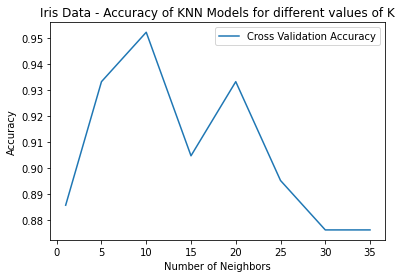

In [ ]:
import matplotlib.pyplot as plt
# Generate plot
plt.title('Iris Data - Accuracy of KNN Models for different values of K')
plt.plot(K_vals, iris_accuracies_for_k_fold, label = 'Cross Validation Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

From the above graph, we can say that the best value of 'K' should be **10**. 

# **CM5 for Heart Disease Data**

Here, we will do the train-validate-test method. 

For that we will need a validation set. We will get it from the train set. 

By spliting train set into two parts we take 90% data for training and 10% for validation.

In [ ]:
# Dividing the train set into train and validation set by a 90-10 split
heart_disease_train_x, heart_disease_val_x, heart_disease_train_y, heart_disease_val_y = train_test_split(heart_disease_train_x, heart_disease_train_y, test_size = 0.1, random_state = 98)

In [ ]:
# Now, let's try the model for different values of K
K_vals = [1,5,10,15,20,25,30,35]
heart_disease_val_accuracies = []

for K in K_vals:
  knn_heart_disease_classifier = KNeighborsClassifier(n_neighbors=K)
  knn_heart_disease_classifier.fit(heart_disease_train_x, heart_disease_train_y)
  # Now, we will validate the model and check its accuracy score
  print("K = "+ str(K))
  train_predicted_y = knn_heart_disease_classifier.predict(heart_disease_train_x)
  train_accuracy = accuracy_score(train_predicted_y, heart_disease_train_y)
  print("Training accuracy: "+str(train_accuracy))

  val_predicted_y = knn_heart_disease_classifier.predict(heart_disease_val_x)
  val_accuracy = accuracy_score(val_predicted_y, heart_disease_val_y)
  heart_disease_val_accuracies.append(val_accuracy)
  print("Validation accuracy: "+str(val_accuracy))

K = 1
Training accuracy: 1.0
Validation accuracy: 0.47058823529411764
K = 5
Training accuracy: 0.756578947368421
Validation accuracy: 0.5882352941176471
K = 10
Training accuracy: 0.7302631578947368
Validation accuracy: 0.47058823529411764
K = 15
Training accuracy: 0.6710526315789473
Validation accuracy: 0.47058823529411764
K = 20
Training accuracy: 0.7105263157894737
Validation accuracy: 0.5294117647058824
K = 25
Training accuracy: 0.6907894736842105
Validation accuracy: 0.5294117647058824
K = 30
Training accuracy: 0.6973684210526315
Validation accuracy: 0.6470588235294118
K = 35
Training accuracy: 0.7039473684210527
Validation accuracy: 0.5882352941176471


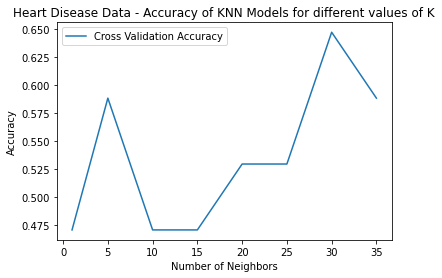

In [ ]:
plt.title('Heart Disease Data - Accuracy of KNN Models for different values of K')
plt.plot(K_vals, heart_disease_val_accuracies, label = 'Cross Validation Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Here, from the output above, that has both training and validation accuracies, and the plot, we can say that K should be **5** as it has the second highest  validation accuracy as well as the highest training accuracy. Generally, we would choose K=30, but here, we know that we have very small amount of data and it does not make sense to consider 30 more points to predict about 1 point when we have only about 200 points in total. So, we went one step forward and considered the second best validation accuracy and as a bonus, we also found that it has the best training accuracy. 

**Answer:**

Both these methods of cross validation have their own pros and cons. The k-fold cross validation is a good choice as it gives one a chance to consider any number of values of 'K' (number of nearest neighbours) on entire train dataset. As beneficial as this might appear, it is very costly in terms of resources. Therefore, it is a good choice only when one has a limited amount of data. In our case, Iris is a very small dataset and therefore, we can attempt k-folds cross validation on Iris. 
Train-validate-test, on the other hand, requires a separate validation dataset on which we would test the model during the process of parameter tuning. This does not need to train on entire train set, but the smaller one with validation set remove from it. Also, as the validation set is (ideally) much smaller than test data, the entire process is boosted up. However, this is a good choice only when one has enough data to be split in three sections (train, validation, test). Comparing the two datasets that we are working on, Heart Disease dataset has more data than Iris and so, we can try train-validate-test method on Heart Disease Dataset. Although, generally, Heart Disease set is still a very small dataset and we can still apply k-fold cross validation on it. 

To put it in a nutshell, both the methods have some advantage over the other and neither is suitable in all conditions. Rather, either can be used depending on the size of data that we have and resources in hand. 

**References:**

1. https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a


**Libraries used in CM6:**

1. sklearn.preprocessing.train_test_split

2. sklearn.preprocessing.label_binarize

3. sklearn.metrics.accuracy_score

4. sklearn.metrics.roc_auc_score

5. sklearn.metrics.f1_score

# **CM6 for Iris Data**

Now that we have the best possible value for 'K', we will train the model with K=10 on training data and then check its performance on test data.

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(iris_train_x, iris_train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
# Getting predictions for both train and test data
iris_train_predicted_y = knn_classifier.predict(iris_train_x)
iris_test_predicted_y = knn_classifier.predict(iris_test_x)

The labels that we have are of string datatype. To calculate the AUC Score and F1-Score, we need them to be numberic. 
Also, for multiple labels, ROC AUC requires prediction array to be of shape -  (n_samples, n_classes). So, we will need to binarize the labels. 

Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [ ]:
iris_classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [ ]:
from sklearn.preprocessing import label_binarize
y_true_train = label_binarize(iris_train_y, classes = iris_classes)
y_pred_train = label_binarize(iris_train_predicted_y, classes = iris_classes)

y_true_test = label_binarize(iris_test_y, classes = iris_classes)
y_pred_test = label_binarize(iris_test_predicted_y, classes = iris_classes) 


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
print("Training Accuracy - For tuned model")
print(accuracy_score(y_true_train, y_pred_train))
print("Testing Accuracy for tuned model")
print(accuracy_score(y_true_test, y_pred_test))

print("Training AUC - For tuned model")
print(roc_auc_score(y_true_train, y_pred_train, average='macro', multi_class='ovo'))
print("Testing AUC for tuned model")
print(roc_auc_score(y_true_test, y_pred_test, average='macro', multi_class='ovo'))

print("Training F1-Score - For tuned model")
print(f1_score(y_true_train, y_pred_train, average='macro'))
print("Testing F1-Score for tuned model")
print(f1_score(y_true_test, y_pred_test, average='macro'))




Training Accuracy - For tuned model
0.9523809523809523
Testing Accuracy for tuned model
0.9047619047619048
Training AUC - For tuned model
0.9656182179889076
Testing AUC for tuned model
0.9500000000000001
Training F1-Score - For tuned model
0.9561781609195402
Testing F1-Score for tuned model
0.9220779220779219


In [ ]:
# As it turned out the accuracy of the model with default parameters is the same as the model with tuned 'K'. 
# This can be because we have very small amount of data. 

# **CM6 for Heart Disease Data**

Now, we need to train the KNN model with K = 5 on entire training set and then check its performance on test data

As we updated the training set and split it into train and val, we will need to get a new split from entire set.
Now, to make sure that we get the same split as beofre, we will use the same seed (random_state = 98).

In [ ]:
heart_disease_train_x, heart_disease_test_x, heart_disease_train_y, heart_disease_test_y= train_test_split(heart_disease_data_missing_interpolated.iloc[:, :-1], heart_disease_data_missing_interpolated.iloc[:, -1], test_size = 0.2, random_state =98)

In [ ]:
K = 5
heart_disease_knn = KNeighborsClassifier(n_neighbors=K)
heart_disease_knn.fit(heart_disease_train_x, heart_disease_train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
heart_disease_test_pred = heart_disease_knn.predict(heart_disease_test_x)
heart_disease_train_pred = heart_disease_knn.predict(heart_disease_train_x)

In [ ]:
print("Training Accuracy - For tuned model")
print(accuracy_score(heart_disease_train_y, heart_disease_train_pred))
print("Testing Accuracy for tuned model")
print(accuracy_score(heart_disease_test_y, heart_disease_test_pred))

print("Training AUC - For tuned model")
print(roc_auc_score(heart_disease_train_y, heart_disease_train_pred))
print("Testing AUC for tuned model")
print(roc_auc_score(heart_disease_test_y, heart_disease_test_pred))

print("Training F1-Score - For tuned model")
print(f1_score(heart_disease_train_y, heart_disease_train_pred, average='macro'))
print("Testing F1-Score for tuned model")
print(f1_score(heart_disease_test_y, heart_disease_test_pred, average='macro'))


Training Accuracy - For tuned model
0.7159763313609467
Testing Accuracy for tuned model
0.6744186046511628
Training AUC - For tuned model
0.7158005617977529
Testing AUC for tuned model
0.669683257918552
Training F1-Score - For tuned model
0.7154882154882154
Testing F1-Score for tuned model
0.6655555555555556


**Answer:**

For Iris Data, the accuracy for testing data did not change even after updating K. This must be because that we have very little amount of data. So, even changing the value of K did not make much difference. 

For Heart Disease Data, the testing accuracy as well as training accuracy have improved significantly after tuning K. 

In conclusion, it is not always necessary that the model will perform better than before if e update 'K' using any of the cross validation methods as there are many other factors that play a role here - the amount of data being the most important one. 

Now, let's try Weighted KNN

# **CM7 For Iris Data**

Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), 

and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

Source: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

As we are trying to improve the model performance, let us use normalized data here instead of original data. 
Ideally, normaliztion improves the model performance drastically, but here, as we have very little data, we meight not see the desirable results. 

In [ ]:
iris_train_x, iris_test_x, iris_train_y, iris_test_y = train_test_split(iris_data_missing_interpolated_zscore_normalized.iloc[:, :-1], iris_data_missing_interpolated_zscore_normalized.iloc[:, -1], test_size=0.2, random_state=98)

In [ ]:
# Euclidean Distance is default (default p = 2)
weighted_knn = KNeighborsClassifier(weights='distance', n_neighbors=10) #For IRIS, we found earlier that best K is 10

In [ ]:
weighted_knn.fit(iris_train_x, iris_train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [ ]:
# Getting predictions for both train and test data
iris_train_predicted_y = weighted_knn.predict(iris_train_x)
iris_test_predicted_y = weighted_knn.predict(iris_test_x)

In [ ]:
from sklearn.metrics import accuracy_score
print("Training Accuracy - For weighted KNN model using Euclidean Distance")
print(accuracy_score(iris_train_predicted_y, iris_train_y))
print("Testing Accuracy - For weighted KNN model using Euclidean Distance")
print(accuracy_score(iris_test_predicted_y, iris_test_y))

Training Accuracy - For weighted KNN model using Euclidean Distance
1.0
Testing Accuracy - For weighted KNN model using Euclidean Distance
0.9047619047619048


In [ ]:
# Manhattan Distance
weighted_knn = KNeighborsClassifier(weights='distance', n_neighbors=10, p=1)

In [ ]:
weighted_knn.fit(iris_train_x, iris_train_y)
# Getting predictions for both train and test data
iris_train_predicted_y = weighted_knn.predict(iris_train_x)
iris_test_predicted_y = weighted_knn.predict(iris_test_x)

In [ ]:
from sklearn.metrics import accuracy_score
print("Training Accuracy - For weighted KNN model using Manhattan Distance")
print(accuracy_score(iris_train_predicted_y, iris_train_y))
print("Testing Accuracy - For weighted KNN model using Manhattan Distance")
print(accuracy_score(iris_test_predicted_y, iris_test_y))

Training Accuracy - For weighted KNN model using Manhattan Distance
1.0
Testing Accuracy - For weighted KNN model using Manhattan Distance
1.0


As it is evident here, we got 100% train and test accuracies from weighted KNN model with K=10 and using Mahattan distance as our distance metric for weighted KNN. 

Now, let us see what we get by chnaging the algorith for weighted KNN. 
As we already have achieved 100% accuracy, we will not try to use some user-defined distance metric for Iris Data. 

In [ ]:
new_knn = KNeighborsClassifier(algorithm='brute', n_neighbors=7, weights='distance', p=1) #algorithn = 'ball_tree', 'kd_tree', 'brute'

In [ ]:
new_knn.fit(iris_train_x, iris_train_y)
# Getting predictions for both train and test data
iris_train_predicted_y = new_knn.predict(iris_train_x)
iris_test_predicted_y = new_knn.predict(iris_test_x)

In [ ]:
from sklearn.metrics import accuracy_score
print("Training Accuracy - For weighted KNN model using Manhattan Distance")
print(accuracy_score(iris_train_predicted_y, iris_train_y))
print("Testing Accuracy - For weighted KNN model using Manhattan Distance")
print(accuracy_score(iris_test_predicted_y, iris_test_y))

Training Accuracy - For weighted KNN model using Manhattan Distance
1.0
Testing Accuracy - For weighted KNN model using Manhattan Distance
1.0


For all the three algorithm methods, the model seems to perform similarly (100% accuracy)

# **CM7 For Heart Disease Data**

Here, we are trying to improve the previous model that we had for Heart Disease Data. So, we will use the normalized data instead of original one. And, we will try the weighted KNN with K=5 (previously known best value of K).
As the previous accuracies were very less, we have a huge scope of improvement. 

In [ ]:
# Euclidean Distance
weighted_knn = KNeighborsClassifier(weights='distance', n_neighbors=5, p=2)

In [ ]:
heart_disease_train_x, heart_disease_test_x, heart_disease_train_y, heart_disease_test_y = train_test_split(heart_disease_data_missing_interpolated_zscore_normalized.iloc[:, :-1], heart_disease_data_missing_interpolated_zscore_normalized.iloc[:, -1], test_size = 0.2, random_state=98) 


In [ ]:
new_train_x, new_val_x, new_train_y, new_val_y = train_test_split(heart_disease_train_x, heart_disease_train_y, test_size=0.1, random_state=98)

In [ ]:
weighted_knn.fit(new_train_x, new_train_y)
# Predictions for both train and test data
val_predicted_y = weighted_knn.predict(new_val_x)
train_predicted_y = weighted_knn.predict(new_train_x)

In [ ]:
from sklearn.metrics import accuracy_score
print("Training Accuracy - For default model")
print(accuracy_score(new_train_y, train_predicted_y))
print("Validation Accuracy - For default model")
print(accuracy_score(new_val_y, val_predicted_y))

Training Accuracy - For default model
1.0
Validation Accuracy - For default model
0.8235294117647058


As we can see, there is a significant improvement in the train and validation accuracies.  

In [ ]:
# Manhattan Distance
weighted_knn = KNeighborsClassifier(weights='distance', n_neighbors=5, p=1)


weighted_knn.fit(new_train_x, new_train_y)
# Predictions for both train and test data
val_predicted_y = weighted_knn.predict(new_val_x)
train_predicted_y = weighted_knn.predict(new_train_x)


print("Training Accuracy - For default model")
print(accuracy_score(new_train_y, train_predicted_y))
print("Validation Accuracy - For default model")
print(accuracy_score(new_val_y, val_predicted_y))

Training Accuracy - For default model
1.0
Validation Accuracy - For default model
0.7647058823529411


As we can see here, Euclidean works better for Heart Disease Data

Therefore, let's train model on entire train set and see the test performance

In [ ]:

weighted_knn = KNeighborsClassifier(weights='distance', n_neighbors=5, p=2)

# Training on entire train set
weighted_knn.fit(heart_disease_train_x, heart_disease_train_y)
# Predictions for both train and test data
heart_disease_test_predicted_y = weighted_knn.predict(heart_disease_test_x)
heart_disease_train_predicted_y = weighted_knn.predict(heart_disease_train_x)


print("Training Accuracy - For default model")
print(accuracy_score(heart_disease_train_y, heart_disease_train_predicted_y))
print("Testing Accuracy - For default model")
print(accuracy_score(heart_disease_test_y, heart_disease_test_predicted_y))

Training Accuracy - For default model
1.0
Testing Accuracy - For default model
0.8837209302325582


This is a very significant improvement over the previous model that was simple KNN with unnormlaized data. 

In [ ]:
# Now, let us try to change the algorithm to see if does any further improvement.

In [ ]:
new_knn = KNeighborsClassifier(algorithm='brute', weights='distance', n_neighbors=5, p=2) #algorith='ball_tree', 'kd_tree', 'brute'

In [ ]:
new_knn.fit(new_train_x, new_train_y)
# Predictions for both train and test data
val_predicted_y = new_knn.predict(new_val_x)
train_predicted_y = new_knn.predict(new_train_x)


print("Training Accuracy - For default model")
print(accuracy_score(new_train_y, train_predicted_y))
print("Validation Accuracy - For default model")
print(accuracy_score(new_val_y, val_predicted_y))

Training Accuracy - For default model
1.0
Validation Accuracy - For default model
0.8235294117647058


This is not better than the previous method. Also, it gives the same result for all the three methods. So, we can keep the previous model configuration as it is. 

In [ ]:
# Now we will use a user-defined distance metric to see if that helps somehow in improving the model performance. 

In [ ]:
def my_distance_func(x1, x2):
  return(np.sum((x1-x2)**2)/len(x1))

In [ ]:
user_defined_knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric=my_distance_func)

In [ ]:
user_defined_knn.fit(new_train_x, new_train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30,
                     metric=<function my_distance_func at 0x7f0f5f27ee60>,
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
# Predictions for both train and test data
val_predicted_y = user_defined_knn.predict(new_val_x)
train_predicted_y = user_defined_knn.predict(new_train_x)


print("Training Accuracy - For default model")
print(accuracy_score(new_train_y, train_predicted_y))
print("Validation Accuracy - For default model")
print(accuracy_score(new_val_y, val_predicted_y))

Training Accuracy - For default model
1.0
Validation Accuracy - For default model
0.8235294117647058


As it seems, this is not an improvement on the previous model. So, the best model we can have is the previous one. So, let us take a deeper insight on all the performance metrcis for that model. 

weighted_knn has the model we need. 

In [ ]:
print("Accuracy for Weighted KNN Model on Heart Disease Data - training data")
print(accuracy_score(heart_disease_train_y, heart_disease_train_predicted_y))


print("Accuracy for Weighted KNN Model on Heart Disease Data - testing data")
print(accuracy_score(heart_disease_test_y, heart_disease_test_predicted_y))


print("ROC-AUC Score for Weighted KNN Model on Heart Disease Data - training data")
print(roc_auc_score(heart_disease_train_y, heart_disease_train_predicted_y))


print("ROC-AUC Score for Weighted KNN Model on Heart Disease Data - testing data")
print(roc_auc_score(heart_disease_test_y, heart_disease_test_predicted_y))


print("F1-Score for Weighted KNN Model on Heart Disease Data - training data")
print(f1_score(heart_disease_train_y, heart_disease_train_predicted_y))


print("F1-Score for Weighted KNN Model on Heart Disease Data - testing data")
print(f1_score(heart_disease_test_y, heart_disease_test_predicted_y))

Accuracy for Weighted KNN Model on Heart Disease Data - training data
1.0
Accuracy for Weighted KNN Model on Heart Disease Data - testing data
0.8837209302325582
ROC-AUC Score for Weighted KNN Model on Heart Disease Data - training data
1.0
ROC-AUC Score for Weighted KNN Model on Heart Disease Data - testing data
0.8936651583710408
F1-Score for Weighted KNN Model on Heart Disease Data - training data
1.0
F1-Score for Weighted KNN Model on Heart Disease Data - testing data
0.8979591836734695
